<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        📑 Insurance Cross Selling 🤝
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  This dataset comes from the Kaggle dataset *Health Insurance Cross-Sell Prediction*, simulating a business scenario where an insurance company wants to predict whether a customer will be interested in a **vehicle insurance cross-sell** offer.
  The dataset contains a balanced mix of numerical and categorical features, with no missing values, making it ideal for practicing **EDA**, **feature engineering**, and experimenting with various classification models.

  This is a **binary classification problem**, where the target variable indicates whether the customer responded positively (`1`) or negatively (`0`) to the cross-sell offer.

* **Goal of the Project** <br>
  Build a machine learning model to **predict whether a customer will be interested in purchasing vehicle insurance** based on their demographic information, vehicle details, and policy-related features.

**Key Features**

| Feature Name           | Description                                                               |
| ---------------------- | ------------------------------------------------------------------------- |
| `id`                   | Unique customer identifier (not used for modeling)                        |
| `Gender`               | Gender of the customer (`Male`, `Female`)                                 |
| `Age`                  | Age of the customer                                                       |
| `Driving_License`      | 1 = customer holds a driving license, 0 = does not                        |
| `Region_Code`          | Encoded region where the customer resides                                 |
| `Previously_Insured`   | 1 = customer already has vehicle insurance, 0 = does not                  |
| `Vehicle_Age`          | Age of the vehicle (`< 1 Year`, `1-2 Year`, `> 2 Years`)                  |
| `Vehicle_Damage`       | Whether the customer’s vehicle has been damaged in the past (`Yes`, `No`) |
| `Annual_Premium`       | The annual premium amount (in currency units)                             |
| `Policy_Sales_Channel` | Encoded sales channel used to acquire the customer                        |
| `Vintage`              | Number of days the customer has been associated with the company          |
| `Response`             | 1 = customer is interested in cross-sell, 0 = not interested              |

**Files Provided**

* `train.csv`: Training dataset (includes the target variable `Response`).
* `test.csv`: Test dataset (without the target variable).
* `train.csv`: Original dataset (includes the target variable `Response`).
* `sample_submission.csv`: Template for submitting predictions.

(Source: [Kaggle Dataset – Health Insurance Cross-Sell Prediction](https://www.kaggle.com/datasets/annantkumarsingh/health-insurance-cross-sell-prediction-data))

(Source: [Kaggle Dataset – Binary Classification of Insurance Cross Selling](https://www.kaggle.com/competitions/playground-series-s4e7))

**Project Objective**

The goal of this notebook is to **analyze customer demographic and policy features to build a robust model for predicting cross-sell interest**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):**
  Understand the distribution of each feature and identify patterns linked to `Response`.

* **Feature Engineering:**
  Encode categorical variables, scale numerical variables, and create additional derived features (e.g., premium per vintage day).

* **Modeling:**
  Test and compare models such as **Logistic Regression**, **Random Forest**, **XGBoost**, and **LightGBM**,...

* **Evaluation Framework:**

  * Apply **Cross-Validation** to ensure model generalization.
  * Evaluate with metrics: **ROC-AUC**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [3]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_origin = pd.read_csv("train_origin.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_origin.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (11504798, 12)

Origin Data Shape: (381109, 12)

Test Data Shape: (7669866, 11)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nOrigin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0



Origin Data Preview:


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0



Test Data Preview:


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [5]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB

Origin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 11504798 samples with 12 columns, including the target variable `Response`.
   - The **original dataset** has 381109 samples and 12 columns, similar in structure but smaller in size. 
   - The **test dataset** includes 7669866 samples with 11 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `Age`, `Annual_Premium`, `Vintage`, `Region_Code`, `Policy_Sales_Channel`.
     - **Categorical features:** `Gender`, `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage`.
   - The target variable is categorical, representing loan status.

**Data Consistency and Completeness**  
   - The datasets have **no missing values**, which simplifies preprocessing and modeling.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

**Differences Between Datasets**  
   - The training data has an additional `id` column, which uniquely identifies each sample.  
   - The original dataset excludes the `id` column but contains the same features and target.

In [6]:
num_features = ["Age", "Annual_Premium", "Vintage", "Region_Code", "Policy_Sales_Channel"]
cat_features = ["Gender", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]
feature_drop = ["Gender", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Response", "id"]

In [7]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.drop(columns=feature_drop, axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nOrigin Data describe:")
display(df_origin.drop(columns=feature_drop, axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cm))

Train Data describe:


,count,mean,std,min,25%,50%,75%,max
Age,11504798.000000,38.383563,14.993459,20.000000,24.000000,36.000000,49.000000,85.000000
Region_Code,11504798.000000,26.418690,12.991590,0.000000,15.000000,28.000000,35.000000,52.000000
Annual_Premium,11504798.000000,30461.370411,16454.745205,2630.000000,25277.000000,31824.000000,39451.000000,540165.000000
Policy_Sales_Channel,11504798.000000,112.425442,54.035708,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,11504798.000000,163.897744,79.979531,10.000000,99.000000,166.000000,232.000000,299.000000



Origin Data describe:


,count,mean,std,min,25%,50%,75%,max
Age,381109.000000,38.822584,15.511611,20.000000,25.000000,36.000000,49.000000,85.000000
Region_Code,381109.000000,26.388807,13.229888,0.000000,15.000000,28.000000,35.000000,52.000000
Annual_Premium,381109.000000,30564.389581,17213.155057,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,381109.000000,112.034295,54.203995,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,381109.000000,154.347397,83.671304,10.000000,82.000000,154.000000,227.000000,299.000000



Test Data describe:


,count,mean,std,min,25%,50%,75%,max
id,7669866.000000,15339730.500000,2214099.744212,11504798.000000,13422264.250000,15339730.500000,17257196.750000,19174663.000000
Age,7669866.000000,38.391369,14.999507,20.000000,24.000000,36.000000,49.000000,85.000000
Region_Code,7669866.000000,26.426614,12.994326,0.000000,15.000000,28.000000,35.000000,52.000000
Annual_Premium,7669866.000000,30465.525668,16445.864722,2630.000000,25280.000000,31827.000000,39460.000000,540165.000000
Policy_Sales_Channel,7669866.000000,112.364992,54.073585,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,7669866.000000,163.899577,79.984449,10.000000,99.000000,166.000000,232.000000,299.000000


## Descriptive Insights from Dataset Statistics

After removing the `id` column, we analyzed the summary statistics of the numerical features (`Age`, `Region_Code`, `Annual_Premium`, `Policy_Sales_Channel`, `Vintage`) across the **train**, **original**, and **test** datasets. The statistics include count, mean, standard deviation, minimum, quartiles, and maximum values.

**Feature Distribution Consistency**

* The **train**, **original**, and **test** datasets show **highly consistent distributions** across all numerical features.
* This indicates that the synthetic data (train/test) was generated or sampled in a way that **preserves the statistical patterns** of the original dataset, reducing risks of distribution shift or covariate mismatch.

**Age**

* Mean age values are almost identical: **38.38** (train), **38.82** (origin), and **38.39** (test).
* Standard deviation is stable at \~15 across datasets.
* The range is consistent: **20** (min) to **85** (max).
* Quartiles are aligned, with median age around **36 years**, showing that the customer base has a stable age profile across datasets.

**Region\_Code**

* Mean values are close: \~26.4 in train/test and \~26.39 in original.
* Standard deviations (\~13.0) and quartiles match closely.
* Ranges from **0** to **52** are consistent, suggesting no missing or irregular region codes across datasets.

**Annual\_Premium**

* Mean premium is \~30,461 (train), \~30,564 (origin), and \~30,466 (test) — extremely close.
* Standard deviation is slightly higher in the original dataset (\~17,213) than synthetic train/test (\~16,445), showing slightly more variability in real data.
* Ranges are identical: min \~2,630 to max \~540,165, indicating potential outliers in premium amounts.
* Quartiles (25%: \~25,277, median: \~31,824, 75%: \~39,451) are almost perfectly matched across datasets.

**Policy\_Sales\_Channel**

* Mean values (\~112.4) and standard deviations (\~54) are consistent across datasets.
* The range (1–163) is identical, suggesting stable distribution of sales channels between real and synthetic data.
* Quartiles align perfectly, with median channels around 151–152.

**Vintage**

* Mean values are \~163.9 (train/test) vs. \~154.35 (origin) — synthetic data customers have been associated with the company slightly longer on average.
* Standard deviations are similar (\~79 synthetic, \~83 real).
* The range is consistent (10–299 days).
* Quartiles show minor differences but remain closely aligned.

**Summary**

* **Synthetic train/test data** closely mirrors the **original dataset**, confirming that the data generation preserved core statistical characteristics.
* Minor deviations observed:

  * Slightly higher mean `Vintage` in synthetic data.
  * Slightly higher `Annual_Premium` variability in original data.
* Overall, the datasets can be confidently used for model training and evaluation **without significant risk of domain shift** or target leakage.

In [8]:
def convert_cat(features, df):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")

convert_cat(features=cat_features, df=df_train)
convert_cat(features=cat_features, df=df_origin)
convert_cat(features=cat_features, df=df_test)

In [9]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype   
---  ------                -----   
 0   id                    int64   
 1   Gender                category
 2   Age                   int64   
 3   Driving_License       category
 4   Region_Code           float64 
 5   Previously_Insured    category
 6   Vehicle_Age           category
 7   Vehicle_Damage        category
 8   Annual_Premium        float64 
 9   Policy_Sales_Channel  float64 
 10  Vintage               int64   
 11  Response              int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 669.3 MB

Origin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gende

In [10]:
print("Train Data describe:")
display(df_train.drop(columns="Response", axis=1).describe(include=["category", "object"]).T)

print("Origin Data describe:")
display(df_origin.drop(columns="Response", axis=1).describe(include=["category", "object"]).T)

print("Test Data describe:")
display(df_test.describe(include=["category", "object"]).T)

Train Data describe:


,count,unique,top,freq
Gender,11504798,2,Male,6228134
Driving_License,11504798,2,1,11482041
Previously_Insured,11504798,2,0,6178116
Vehicle_Age,11504798,3,1-2 Year,5982678
Vehicle_Damage,11504798,2,Yes,5783229


Origin Data describe:


,count,unique,top,freq
Gender,381109,2,Male,206089
Driving_License,381109,2,1,380297
Previously_Insured,381109,2,0,206481
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


Test Data describe:


,count,unique,top,freq
Gender,7669866,2,Male,4151402
Driving_License,7669866,2,1,7654686
Previously_Insured,7669866,2,0,4118126
Vehicle_Age,7669866,3,1-2 Year,3989276
Vehicle_Damage,7669866,2,Yes,3854463


## Insights on Categorical Features

**Consistency of Categories Across Datasets**

* The five categorical features — **`Gender`**, **`Driving_License`**, **`Previously_Insured`**, **`Vehicle_Age`**, and **`Vehicle_Damage`** — show **consistent unique category counts** across the **train**, **original**, and **test** datasets.
* This consistency ensures **model stability** during both training and inference, minimizing the risk of **unseen categories** in the prediction phase.

**Gender**

* Binary feature with values `Male` and `Female`.
* The dominant category is **`Male`**:

  * **54.14%** in Train (6,228,134 / 11,504,798)
  * **54.05%** in Origin (206,089 / 381,109)
  * **54.16%** in Test (4,151,402 / 7,669,866)
* Distribution is extremely stable across datasets.

**Driving\_License**

* Binary feature with values `1` (has license) and `0` (no license).
* The dominant category is **`1`**:

  * **99.49%** in Train (11,482,041 / 11,504,798)
  * **99.71%** in Origin (380,297 / 381,109)
  * **99.55%** in Test (7,654,668 / 7,669,866)
* Extremely skewed towards having a driving license — could be a strong feature but also risk low variability.

**Previously\_Insured**

* Binary feature with values `1` (already insured) and `0` (not insured).
* The dominant category is **`0`**:

  * **53.71%** in Train (6,178,116 / 11,504,798)
  * **54.17%** in Origin (206,481 / 381,109)
  * **53.64%** in Test (4,118,126 / 7,669,866)
* Highly stable distribution, indicating consistent sampling.

**Vehicle\_Age**

* Three unique values: `< 1 Year`, `1-2 Year`, and `> 2 Years`.
* The dominant category is **`1-2 Year`**:

  * **52.02%** in Train (5,982,678 / 11,504,798)
  * **52.53%** in Origin (200,316 / 381,109)
  * **52.09%** in Test (3,998,276 / 7,669,866)
* Very consistent across datasets.

**Vehicle\_Damage**

* Binary feature with values `Yes` and `No`.
* The dominant category is **`Yes`**:

  * **50.27%** in Train (5,783,229 / 11,504,798)
  * **50.44%** in Origin (192,413 / 381,109)
  * **50.25%** in Test (3,854,463 / 7,669,866)
* Near-perfect alignment across datasets.

**Conclusion**

* All categorical features have **excellent structural and distributional alignment** between synthetic training/test data and the original dataset.
* This reduces the risk of **data drift** and **unseen category issues** during inference.
* The model can be trained with confidence, though encoding methods (e.g., one-hot or target encoding) should still be applied as good practice.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [11]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")


In [12]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 11,504,798 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 381,109 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 7,669,866 rows.


## Checking duplicate Value

In [13]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 11,504,798 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 381,109 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 7,669,866 rows



In [14]:
# Drop duplicate
for df in [df_origin]:
    df.drop_duplicates(inplace=True)

for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 11,504,798 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 381,109 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 7,669,866 rows



## Checking Outlier Value

In [15]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count
0,Annual_Premium,2377273


In [16]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


,Feature,Outlier Count
0,Annual_Premium,10320


In [17]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count
0,Annual_Premium,1581988


### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **Training Data**:

  * **0 duplicate rows** found in 11,504,798 records.

* **Original Data**:

  * **269 duplicates** detected (**0.07%** of 381,109 rows).
  * Since the number is not large, we will drop the duplicate rows.

* **Test Data**:

  * **No duplicates** detected in 7,669,866 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `Annual_Premium`.

**Conclusion**

* The **synthetic training** and **test datasets** exhibit excellent data quality with **no missing entries**.
* The **original dataset** contains minor **duplication**, which have been addressed before being used for training or validation.
* The outlier value exist across the **train**, **test**, and **original** datasets.
* Overall, data readiness is high and preprocessing complexity is minimal.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [18]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [19]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", weight = "bold")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Response Distribution

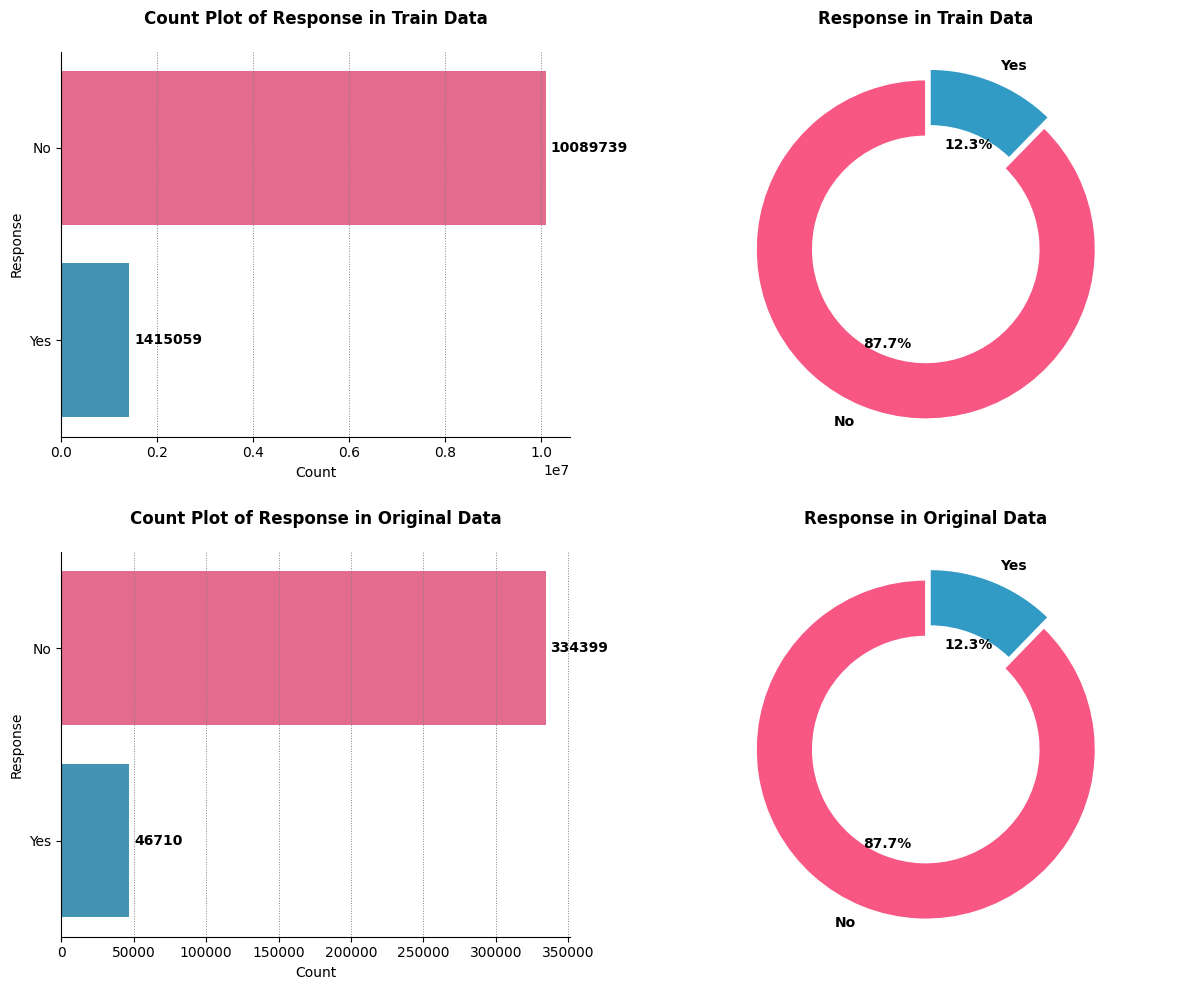

In [20]:
# Set target variable
target_variable = "Response"

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]
    sns.countplot(y=target_variable, data=data, ax=ax, palette=color(n_colors=2))
    ax.set_title(f"Count Plot of Response in {title}", pad=20, weight="bold")
    ax.set_ylabel("Response")
    ax.set_xlabel("Count")
    ax.set_yticks([0, 1], ["No", "Yes"])
    ax.grid(axis="x", color="gray", linestyle=":", linewidth=0.7)

    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.text(width + max(data[target_variable].value_counts())*0.01, y,
                f"{int(width)}", 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    loan_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = axes[i, 1].pie(
        loan_counts,
        labels=["No", "Yes"],
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=2),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2,
        explode = (0, 0.08)
    )
    
    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")
    
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Response in {title}", pad=20, weight="bold")
    axes[i, 1].axis("equal") 

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

### **Distribution Analysis of Response**

**1. Overview of Class Distribution**

The visualizations compare the `Response` distribution in both the **Training Data** and **Original Data**. Each dataset is shown with:

* A **count plot** (absolute counts)
* A **donut chart** (percentage proportions)

**A. Training Data**

**Count Statistics**

* `No` (Customer not interested in cross-sell): **10,089,739 instances**
* `Yes` (Customer interested in cross-sell): **1,415,059 instances**

**Percentage Distribution**

* `No`: **87.7%**
* `Yes`: **12.3%**

> **Insight**:
> The training dataset is **highly imbalanced**, with the “No” class dominating. Only about **1 in 8 customers** are interested in the cross-sell.

**B. Original Data**

**Count Statistics**

* `No`: **334,155 instances**
* `Yes`: **46,685 instances**

**Percentage Distribution**

* `No`: **87.7%**
* `Yes`: **12.3%**

> **Insight**:
> The original dataset has the **same class distribution** as the training dataset, confirming that the synthetic train data preserves the real-world imbalance.

**3. Key Observations & Implications**

| Aspect                   | Training Data | Original Data | Observation                                            |
| ------------------------ | ------------- | ------------- | ------------------------------------------------------ |
| Majority Class           | `No` (87.7%)  | `No` (87.7%)  | Both datasets are heavily skewed toward the “No” class |
| Minority Class           | `Yes` (12.3%) | `Yes` (12.3%) | Severe underrepresentation of the “Yes” class          |
| Class Imbalance Severity | **High**      | **High**      | Indicates strong imbalance that may bias the model     |
| Risk of Bias             | Yes           | Yes           | Model may overpredict “No” unless imbalance is handled |

**Conclusion**

The `Response` variable shows a **clear and severe class imbalance** in both the synthetic training set and the original dataset.
Without intervention (e.g., **oversampling, SMOTE, or class weighting**), this imbalance can lead to a model that appears accurate but performs poorly in detecting positive (`Yes`) responses.

## Numerical Feature Distributions

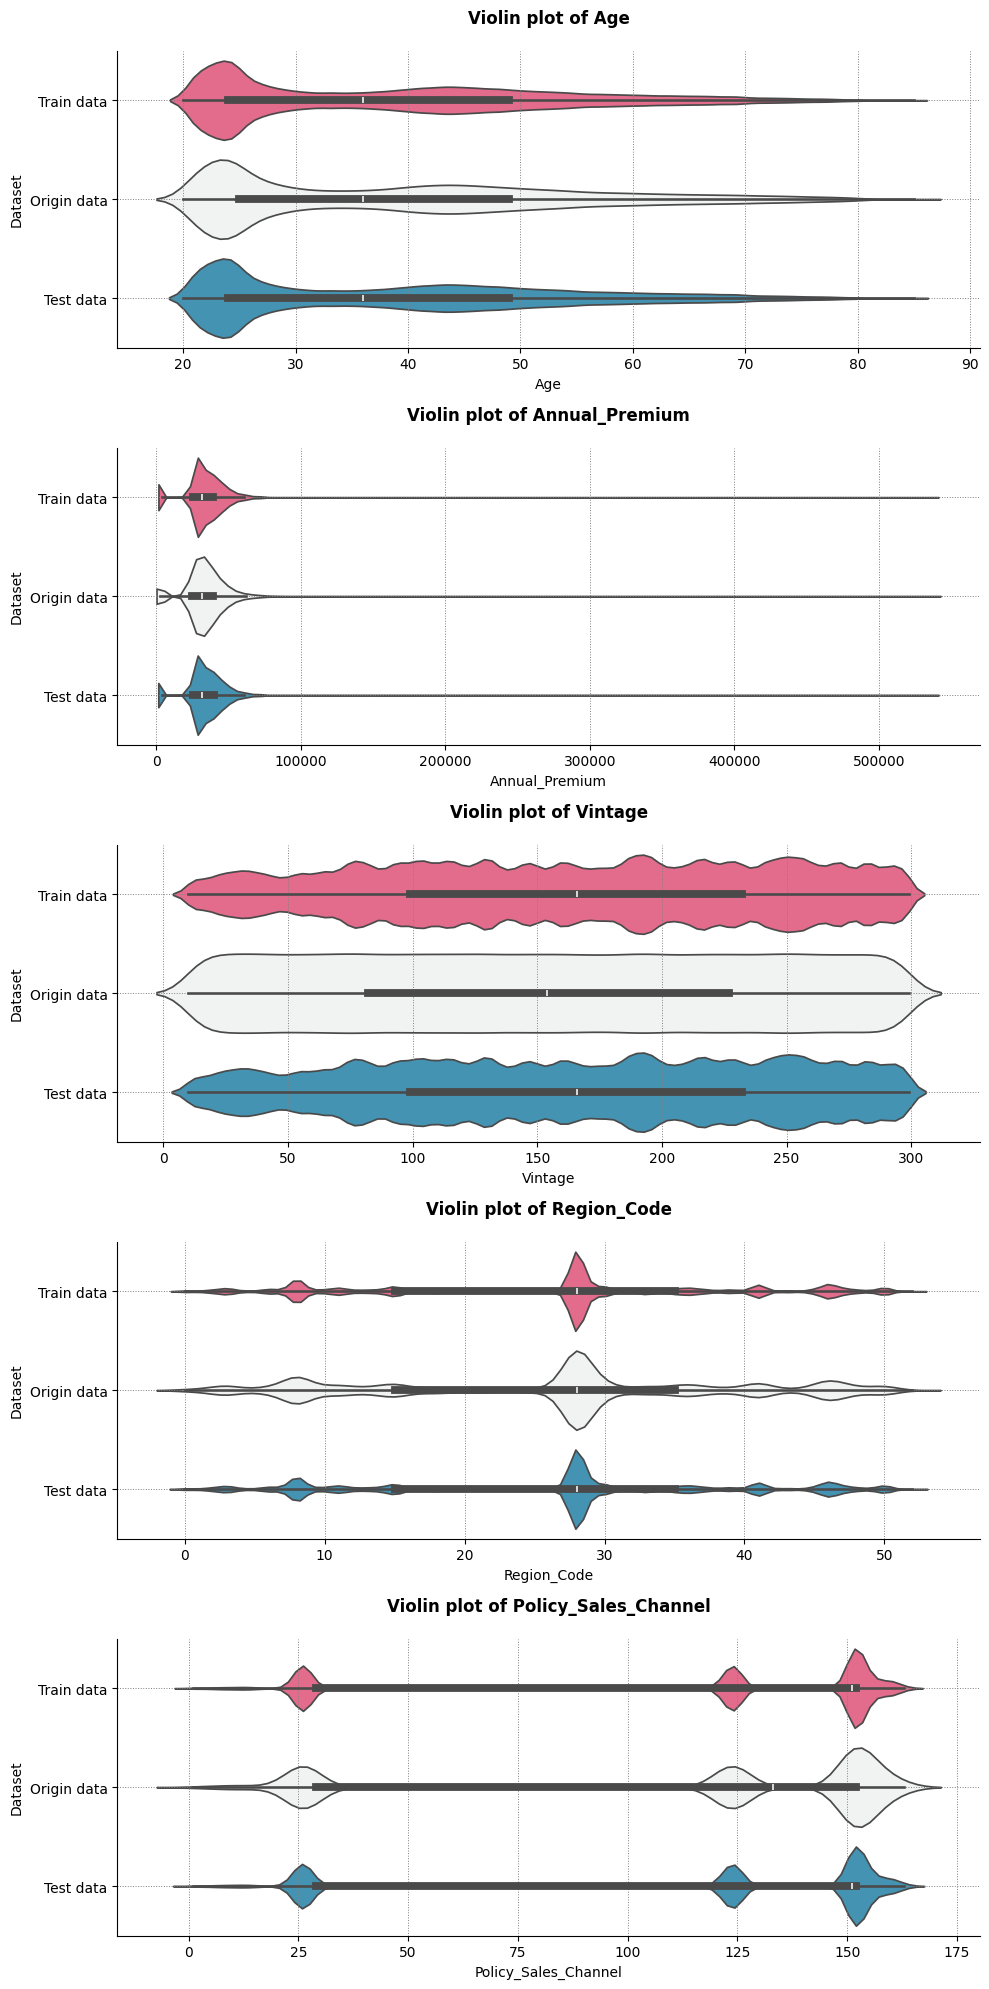

In [21]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)  # The color function you defined earlier
    n = len(num_features)

    fig, ax = plt.subplots(n, 1, figsize=(10, n * 4))
    if n == 1:
        ax = [ax]  # Ensure ax is iterable when there is only one feature

    for i, feature in enumerate(num_features):
        # Combine data for violin plot
        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            ax=ax[i]
        )
        ax[i].set_title(f"Violin plot of {feature}", pad=20, weight="bold")
        ax[i].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=ax[i])

    plt.tight_layout()
    plt.show()

# Call the function
plot_numerical_features(
    df_train=df_train,
    df_test=df_test,
    df_origin=df_origin,
    num_features=num_features
)

In [22]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Annual_Premium                 |   +1.7661 | Highly skewed
Policy_Sales_Channel           |   -0.9000 | Moderately skewed
Age                            |   +0.6725 | Moderately skewed
Region_Code                    |   -0.1153 | Approximately symmetric
Vintage                        |   +0.0030 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Policy_Sales_Channel           |   -0.9151 | Moderately skewed
Annual_Premium                 |   +0.7769 | Moderately skewed
Age                            | 

### **Insights on Numerical Feature Distributions**

**1. Distribution Consistency Across Datasets**

* **violin plots** for the numerical features (`Age`, `Annual_Premium`, `Vintage`, `Region_Code`, `Policy_Sales_Channel`) show that the **train**, **test**, and **original** datasets have nearly identical distributions.
* This indicates that the synthetic data generation process **preserved the statistical distribution characteristics** of the original dataset, reducing the risk of **distribution shift** and improving the model’s **generalization** ability.

**2. Shape and Spread of Distributions**

* **Age**: Right-skewed distribution (many younger customers, fewer older ones), mostly concentrated between ages 20–50.
* **Annual\_Premium**: Long right tail with many extreme values, indicating substantial differences in insurance premium amounts.
* **Vintage**: Fairly uniform distribution from 0–300 days, reflecting diverse customer tenure.
* **Region\_Code** & **Policy\_Sales\_Channel**: Multimodal patterns, showing clusters of popular region codes and sales channels.

**3. Skewness Analysis**

**Original Data**

* **Highly skewed**: `Annual_Premium` (+1.77) → skewness handling may be necessary if using models sensitive to distribution shape.
* **Moderately skewed**: `Policy_Sales_Channel` (-0.90), `Age` (+0.67).
* **Approximately symmetric**: `Region_Code` (-0.11), `Vintage` (+0.00).

**Train/Test Data**

* **Moderately skewed**: `Policy_Sales_Channel` (~-0.91), `Annual_Premium` (~+0.77), `Age` (\~+0.64).
* **Approximately symmetric**: `Region_Code` (~-0.13), `Vintage` (~-0.11).

> **Insight**: Features with skewness (|skewness| > 0.5) may benefit from transformations such as **log**, **Box-Cox**, or **Yeo-Johnson** to improve the performance of models—especially linear ones or tree-based models where split thresholds can be influenced by skewed distributions.

**4. Feature-Specific Observations**

* **Age**: Large proportion of customers aged 20–40, with a declining count in older age groups.
* **Annual\_Premium**: Contains extreme outliers (above 400,000), suggesting **capping/winsorization** might be beneficial.
* **Vintage**: Nearly uniform distribution, no skewness handling required.
* **Region\_Code**: Some region codes are significantly more frequent than others.
* **Policy\_Sales\_Channel**: A few sales channels dominate the frequency distribution, causing negative skewness.

**5. Conclusion**

* Numerical data is generally stable across datasets, with only a few features showing notable skewness that should be addressed before modeling.
* Handling skewness and outliers will help the model become **more robust** and less sensitive to extreme values.

## Correlation Analysis of Numerical Features

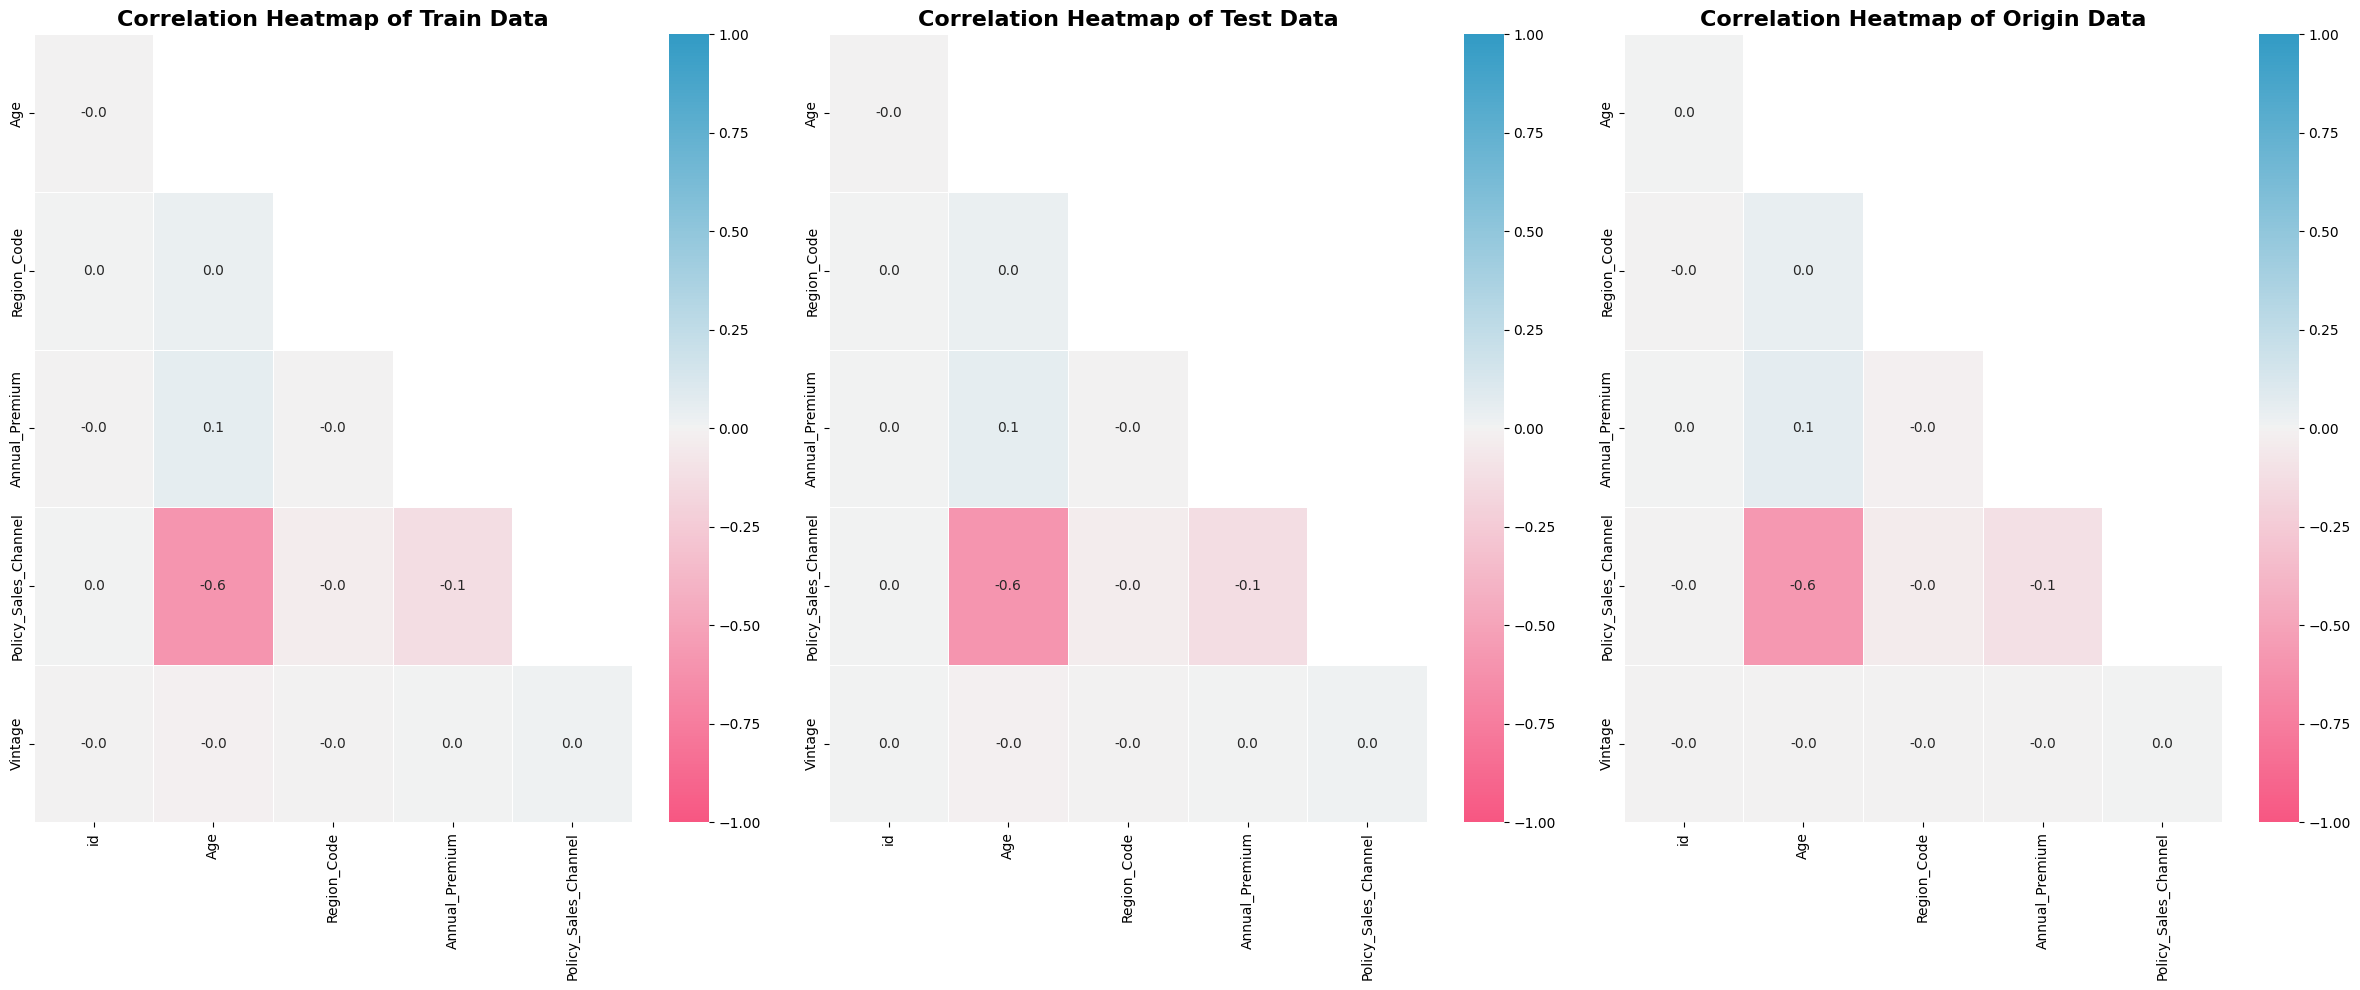

In [23]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_origin = df_origin.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train.drop(columns="Response", axis=1),
                 df_origin=df_origin.drop(columns="Response", axis=1),
                 df_test=df_test)

### Insights from Correlation Analysis of Numerical Features

**Observation on Correlation Heatmaps**

* The **correlation structure** between the **origin**, **training**, and **test** datasets is **highly consistent**, indicating **no data drift** across datasets.

* This consistency increases confidence that models trained on the synthetic data will behave similarly on real-world data.

* Across all datasets, most features show **very low correlation** with each other, suggesting limited linear relationships:

  * The strongest correlation is between **`Age`** and **`Policy_Sales_Channel`** at around **-0.6** (negative), implying that certain sales channels are more common among specific age groups.
  * `Annual_Premium` has a very weak correlation (\~0.1) with `Age`.
  * Other feature pairs (e.g., `Region_Code` with `Vintage`) are near **0.0**, indicating no linear relationship.

**Implication – Low Risk of Multicollinearity**

* The generally low correlations mean that **multicollinearity risk is minimal** for most features.
* This is beneficial for:

  * **Linear models** (e.g., Logistic Regression), where high multicollinearity can destabilize coefficient estimates.
  * **Tree-based models**, where feature splits are less sensitive to correlated predictors.

**Conclusion**

* The correlation patterns are stable and weak across all datasets, confirming **feature independence** in terms of linear relationships.
* The only moderate relationship observed (`Age` vs. `Policy_Sales_Channel`) could be explored further for potential business insights rather than as a modeling concern.

## Categorical Feature Distributions

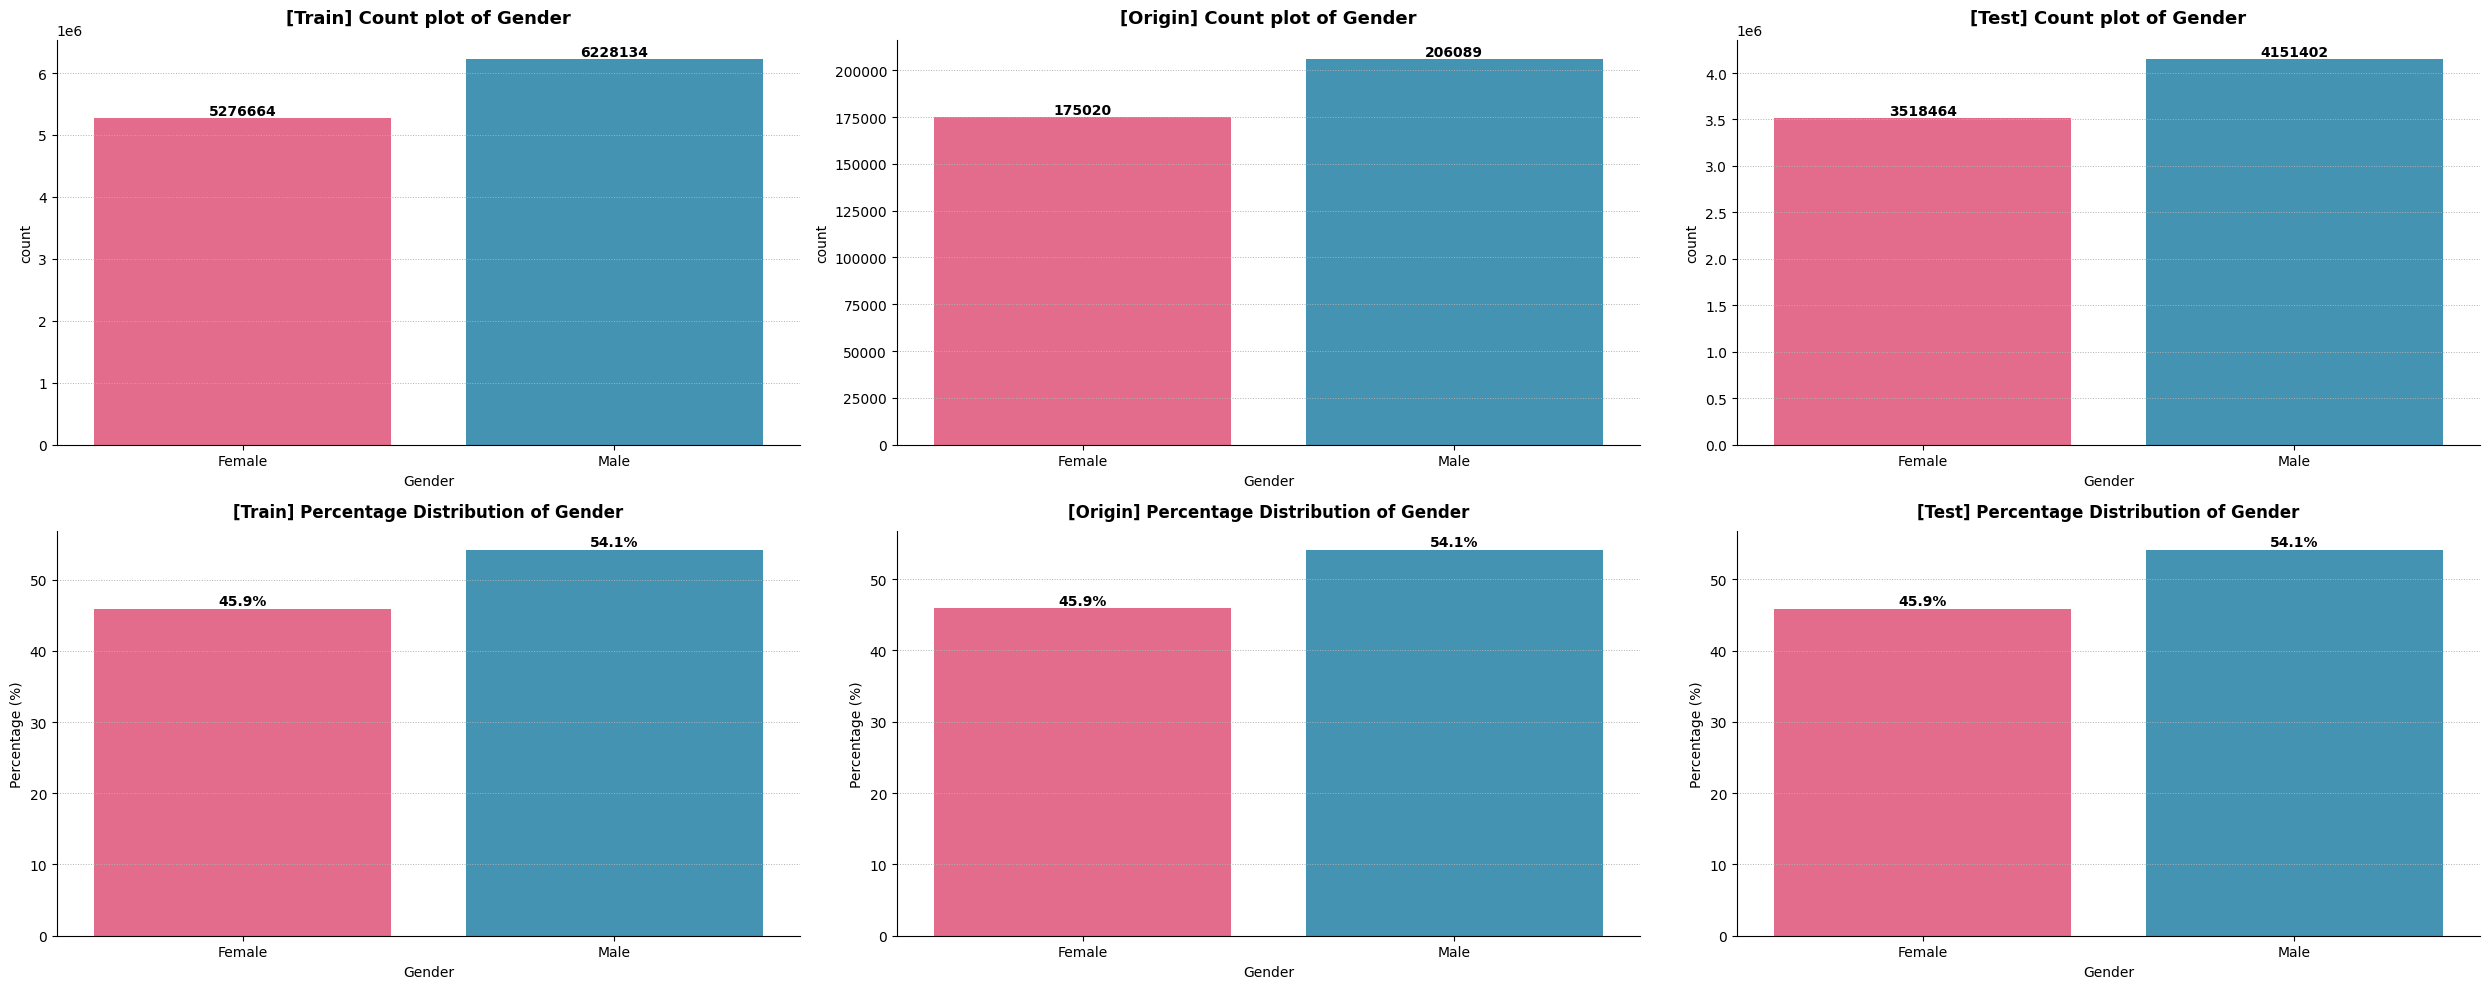

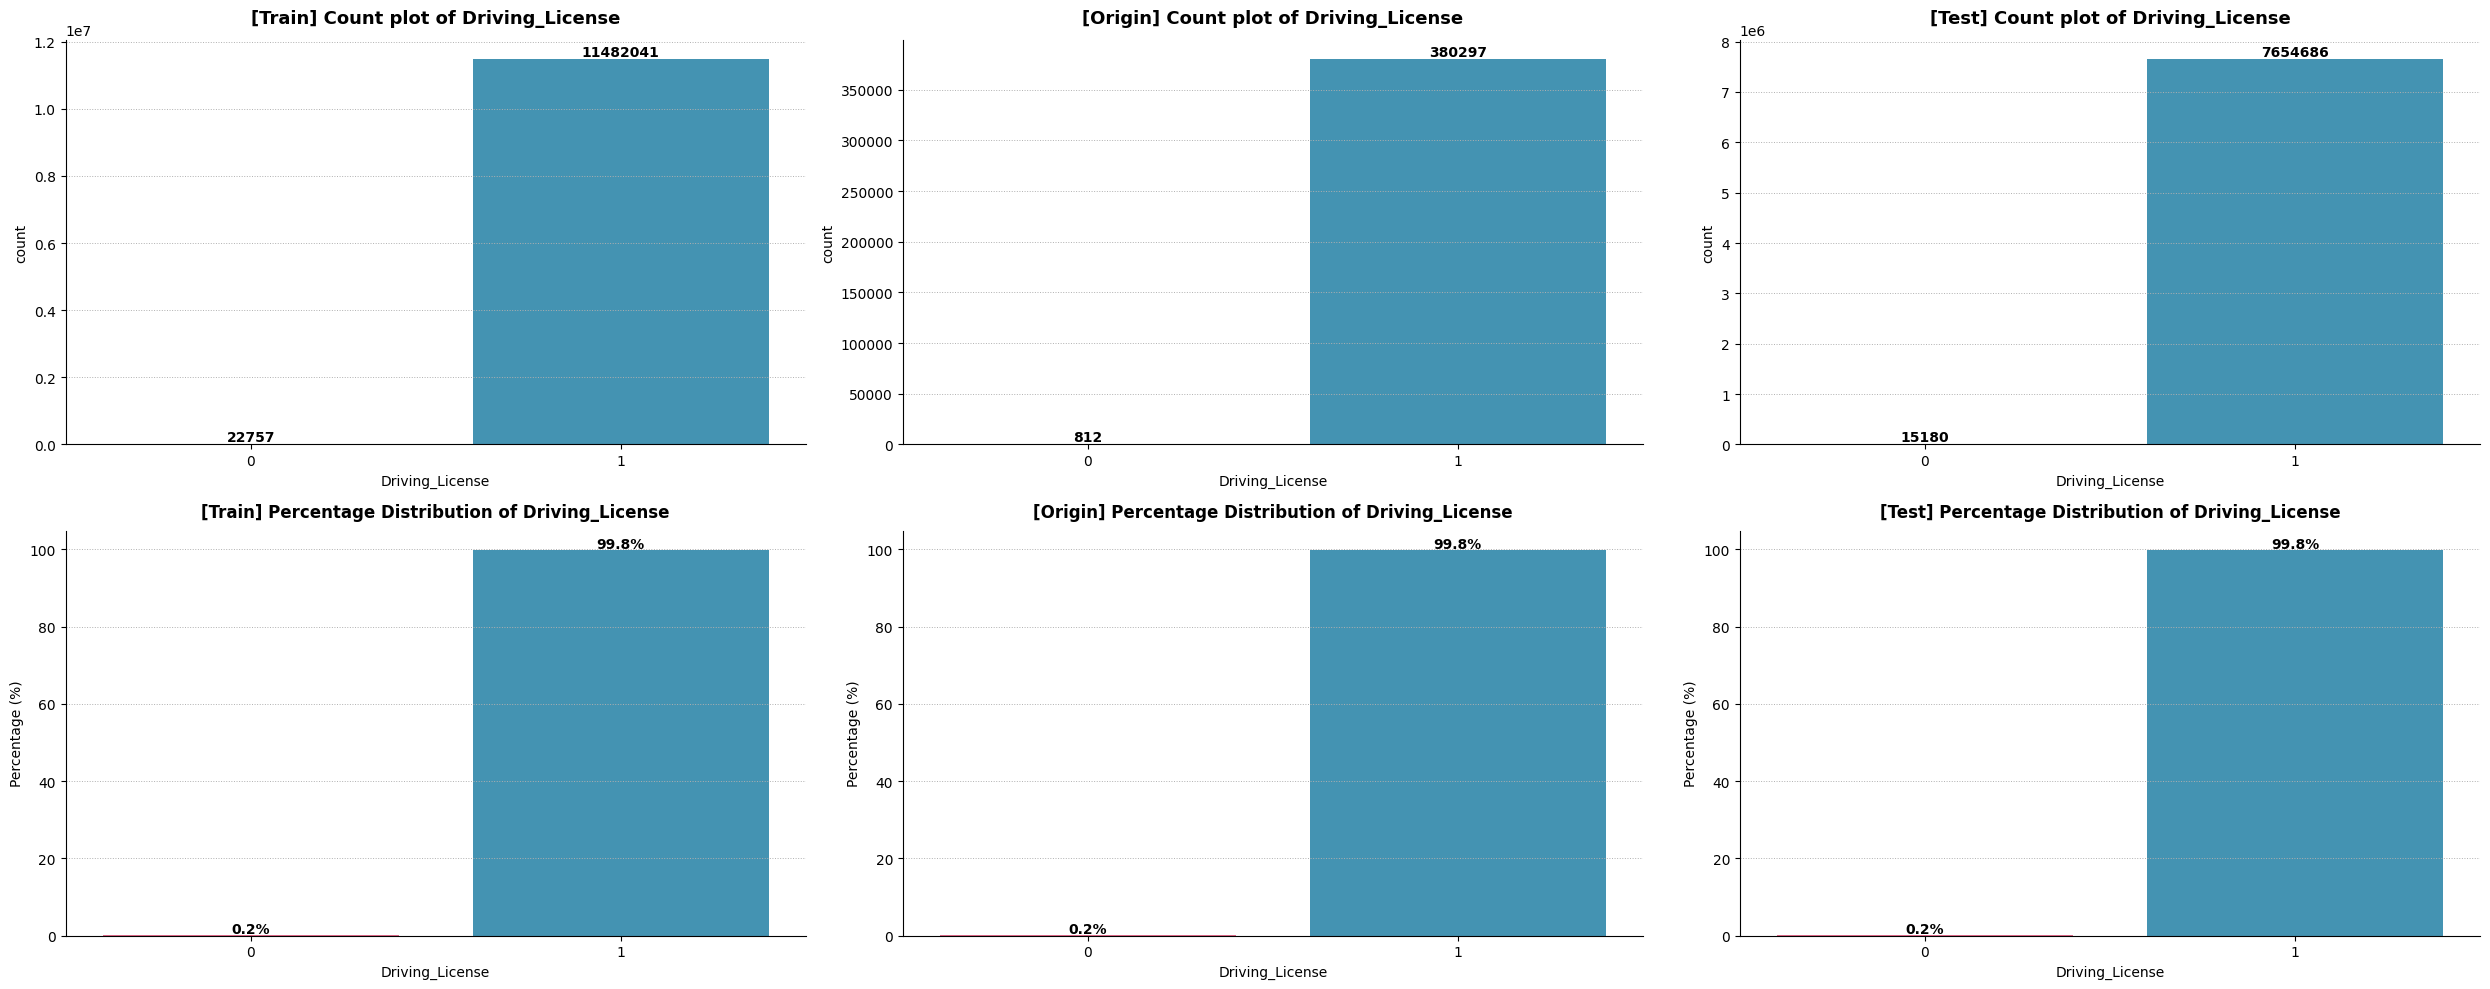

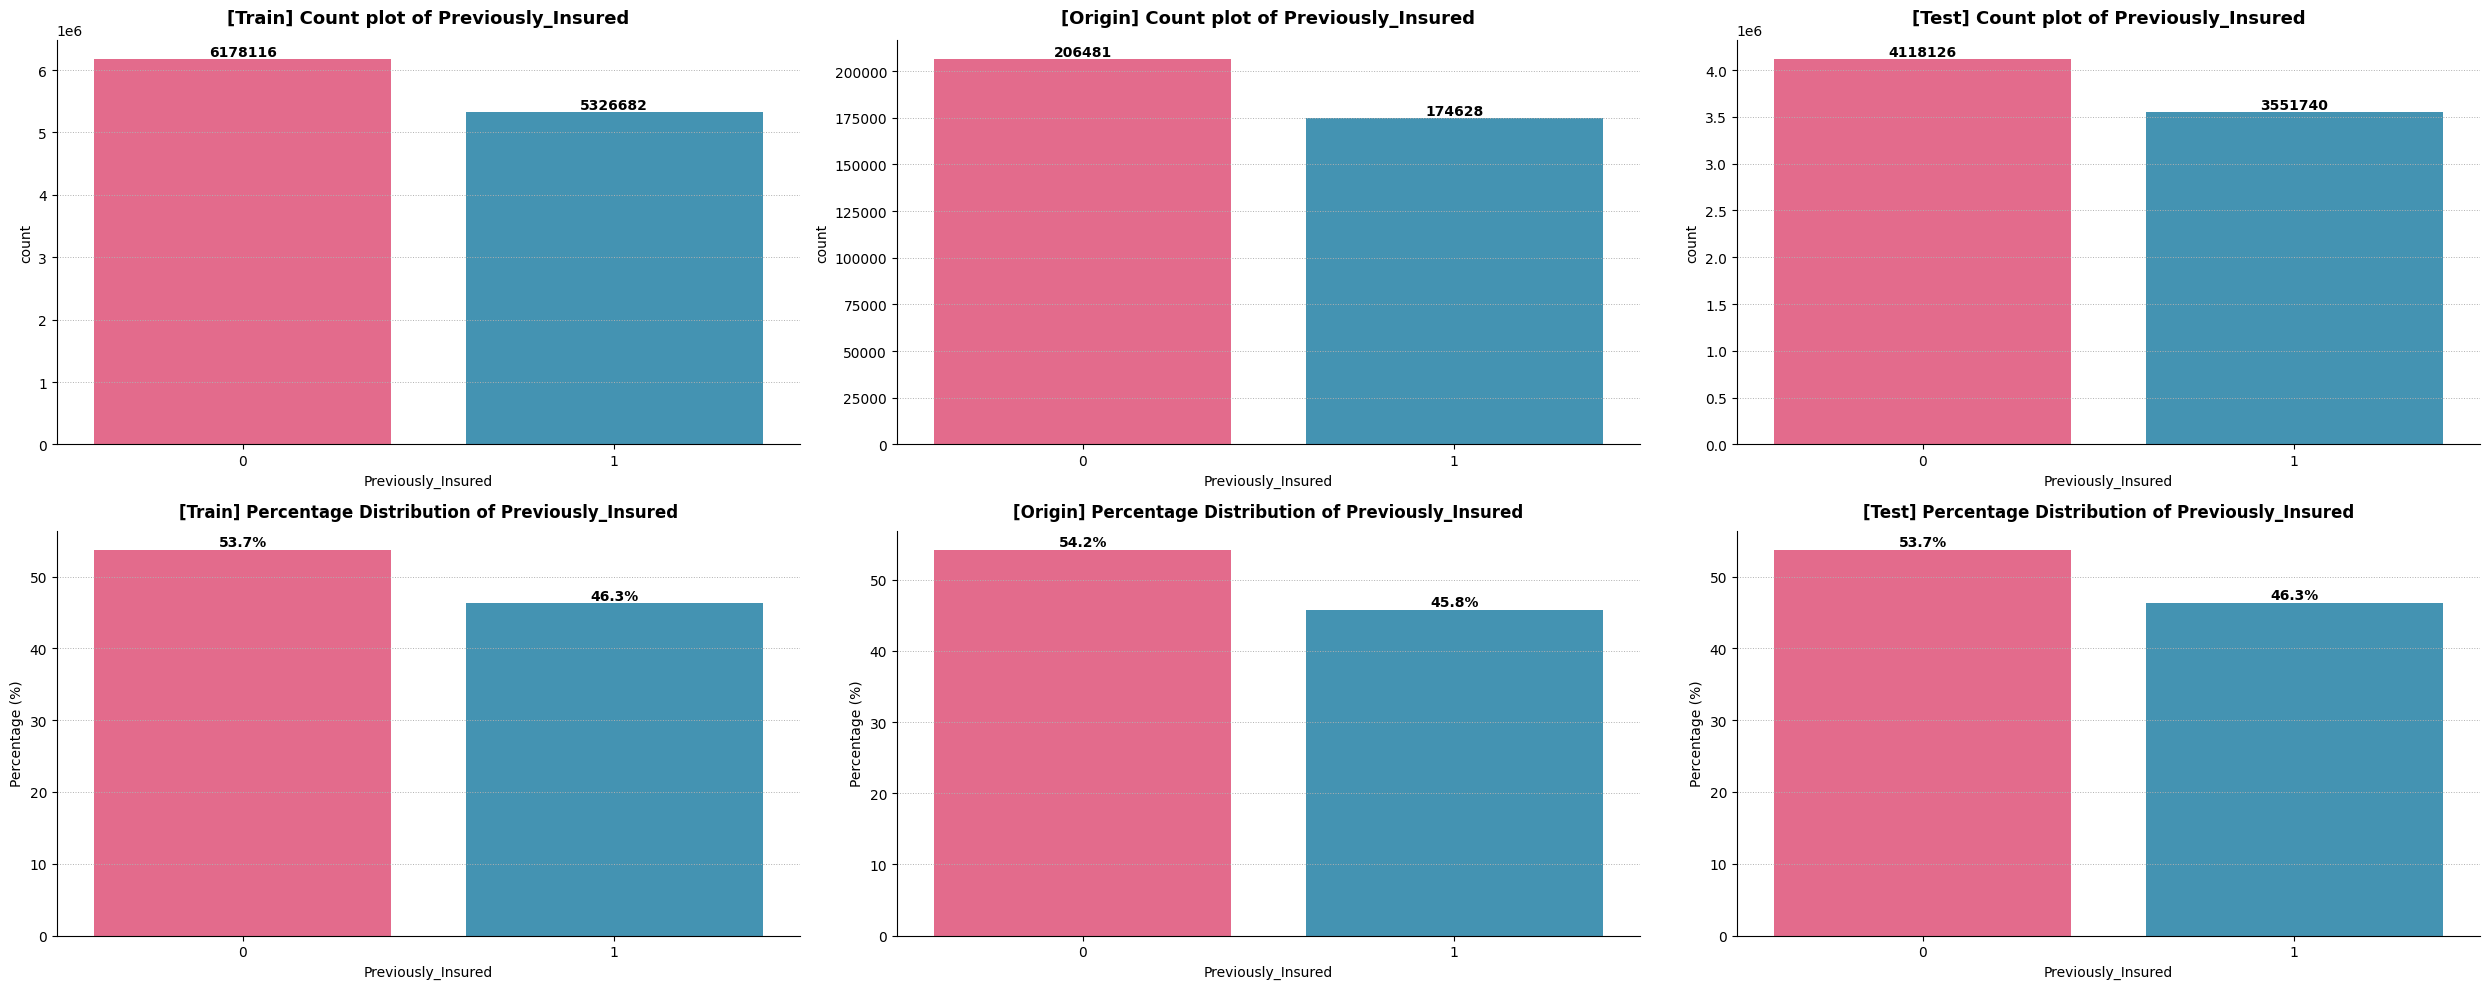

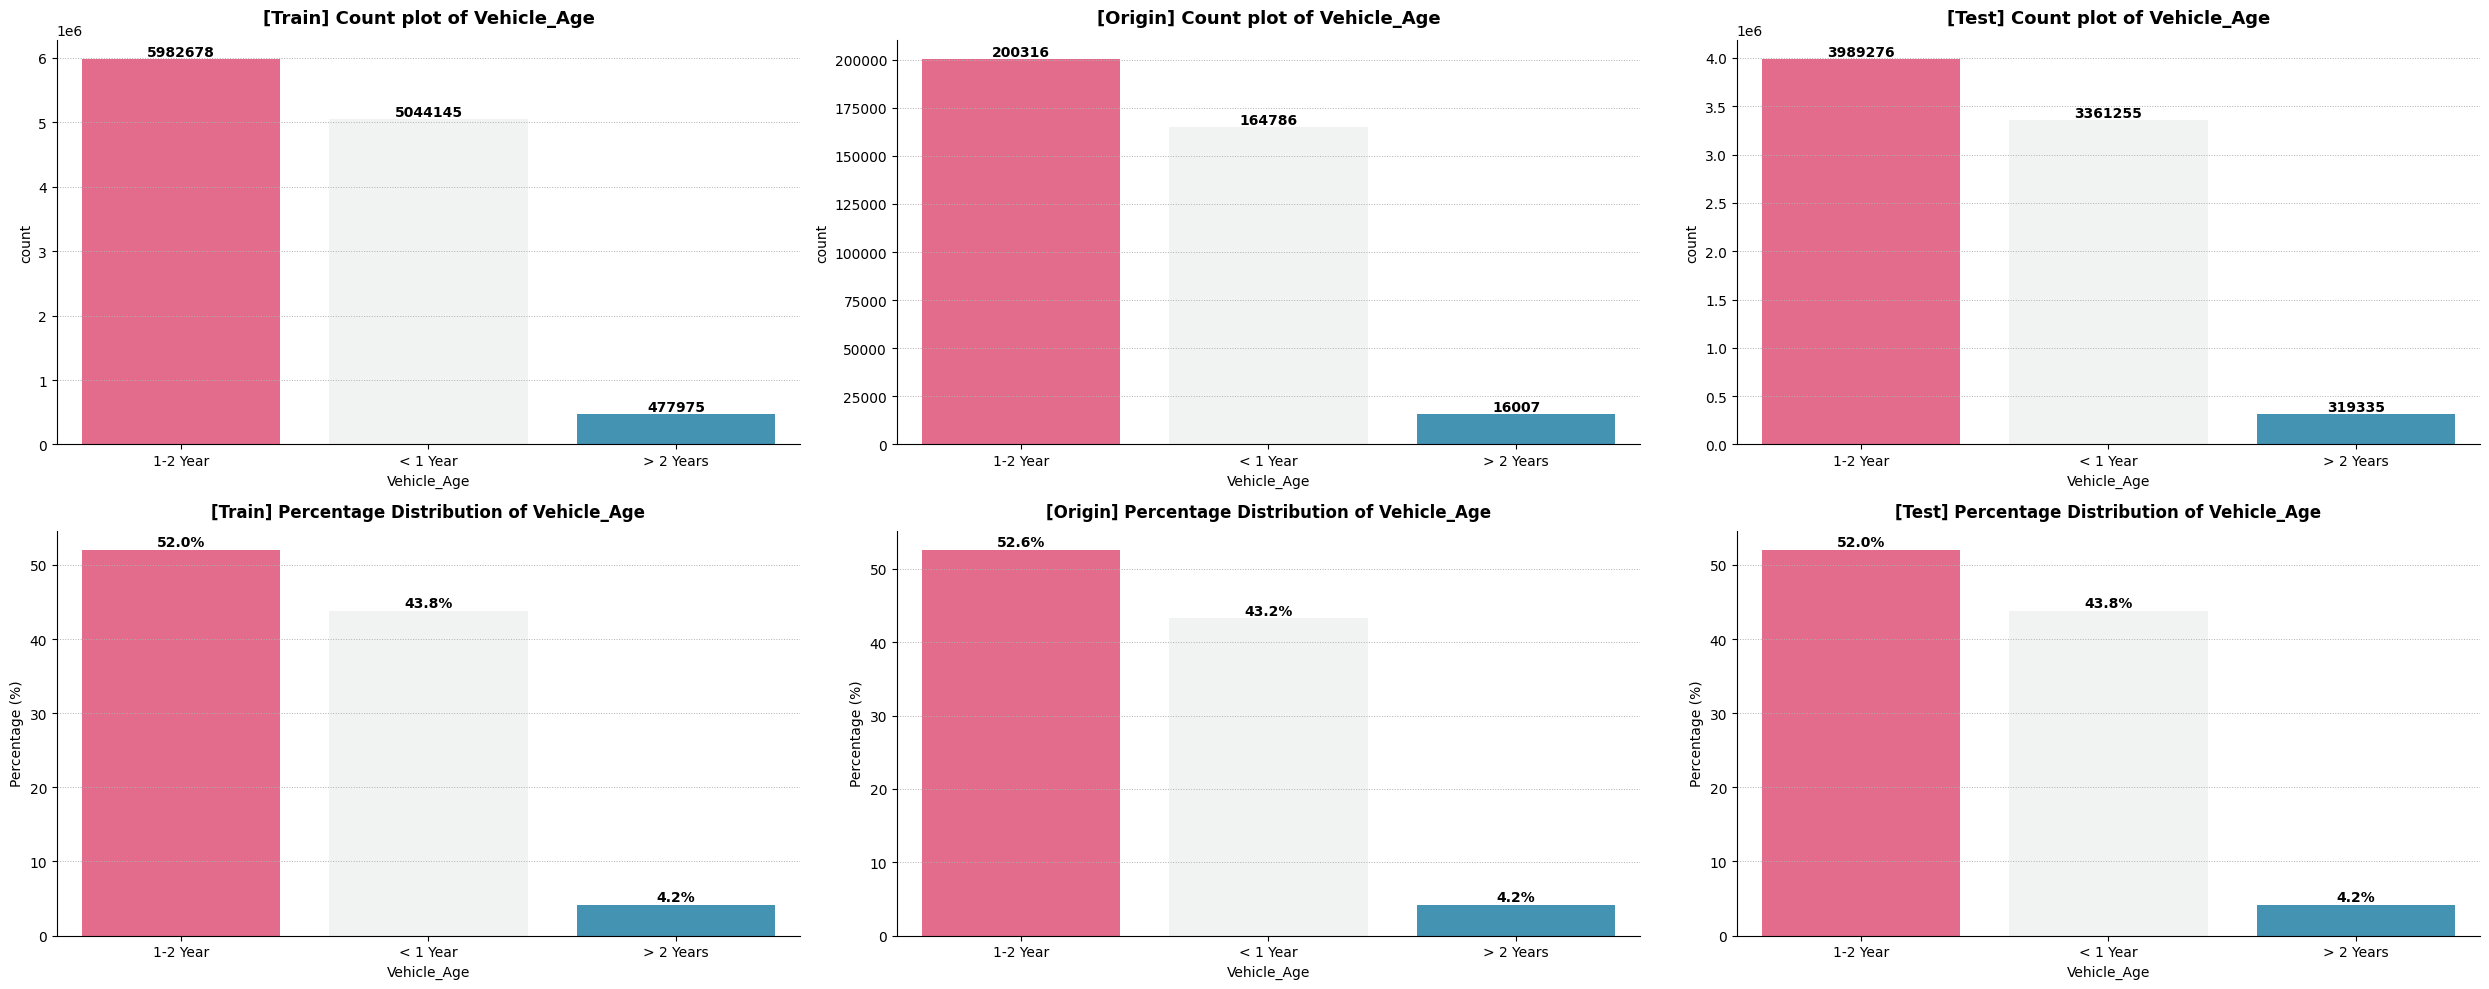

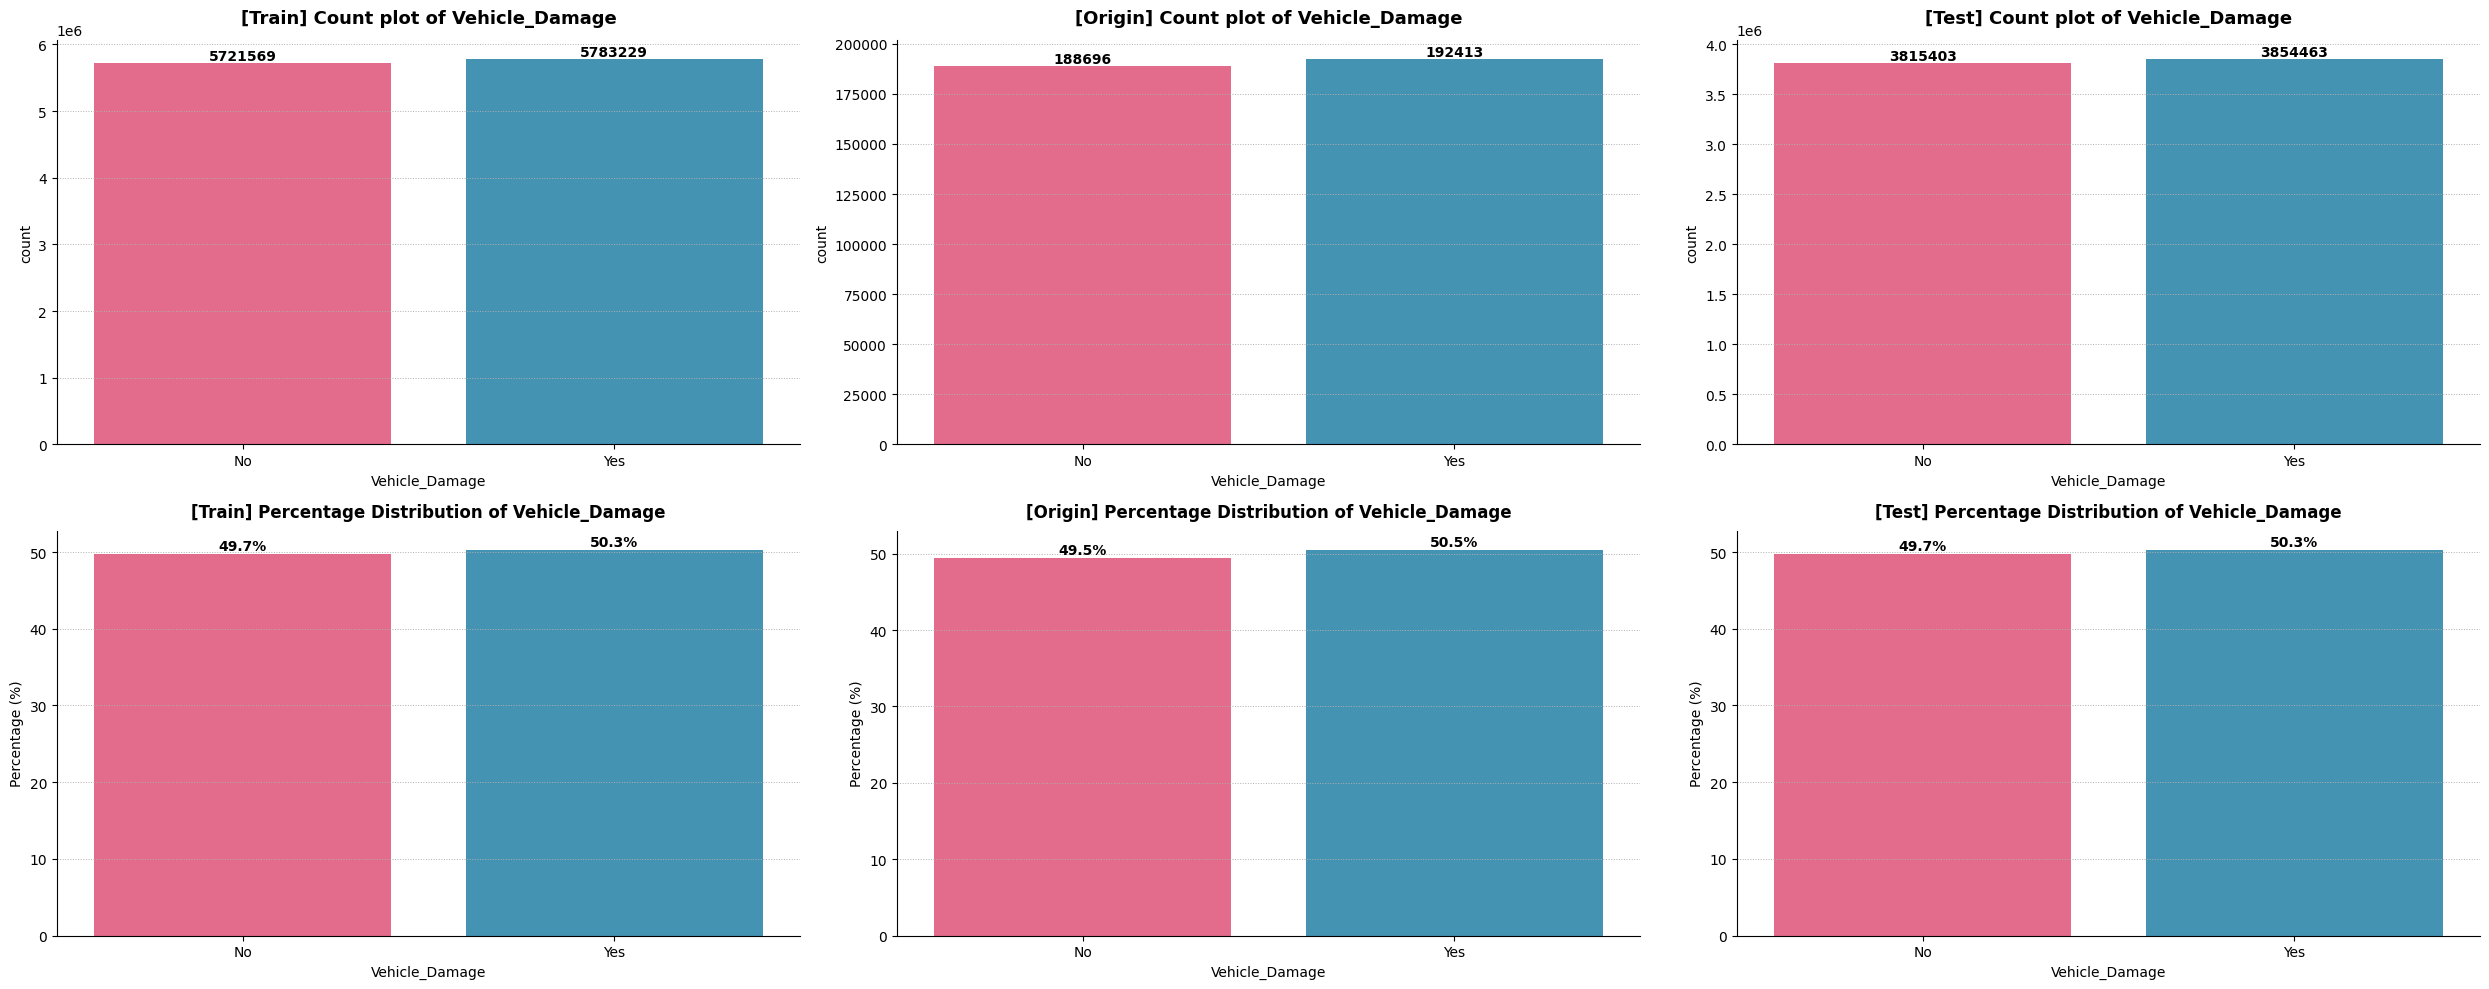

In [24]:
def plot_categorical_distribution(cat_features, df_train, df_test, df_origin, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – ORIGIN
        sns.countplot(data=df_origin, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Origin] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 2], 
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 2].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 2], left=False, bottom=False)
        for container in ax[0, 2].containers:
            ax[0, 2].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[1, 0],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 0], left=False, bottom=False)
        ax[1, 0].set_ylabel("Percentage (%)")
        ax[1, 0].set_xlabel(feature)
        ax[1, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(train_percent.values):
            ax[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – ORIGIN
        origin_percent = df_origin[feature].value_counts(normalize=True) * 100
        origin_percent = origin_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=origin_percent.index, y=origin_percent.values, ax=ax[1, 1],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Origin] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 1], left=False, bottom=False)
        ax[1, 1].set_ylabel("Percentage (%)")
        ax[1, 1].set_xlabel(feature)
        ax[1, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(origin_percent.values):
            ax[1, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1, 2],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 2].set_title(f"[Test] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 2], left=False, bottom=False)
        ax[1, 2].set_ylabel("Percentage (%)")
        ax[1, 2].set_xlabel(feature)
        ax[1, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(test_percent.values):
            ax[1, 2].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        plt.tight_layout()
        plt.show()

plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test, df_origin=df_origin)

In [25]:
def top_ratio(df_test = df_test, df_train = df_train, df_origin=df_origin, cat_features = cat_features):
    dataset_names = ["Train", "Test", "Origin"]
    datasets = [df_train, df_origin, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
⚠️  Driving_License: 99.8% là '1'
**************************************************
Test Data
⚠️  Driving_License: 99.8% là '1'
**************************************************
Origin Data
⚠️  Driving_License: 99.8% là '1'
**************************************************


### Insights on Categorical Feature Distributions

**Gender Distribution**
The `Gender` feature has **two categories**: **Female** and **Male**.
Across all datasets (Train, Origin, Test), the distribution is relatively balanced, with a slight majority of **Male**:

* Train: Female **45.9%**, Male **54.1%**
* Origin: Female **45.9%**, Male **54.1%**
* Test: Female **45.9%**, Male **54.1%**

**Interpretation:**
This indicates only a minor gender imbalance, which is unlikely to cause serious bias in modeling. The proportions are consistent across all dataset splits, suggesting a well-preserved distribution during data splitting.

**Driving License Distribution**
The `Driving_License` feature is a binary variable (0 = No license, 1 = Has license).
It is **extremely imbalanced**, with **99.8%** of records having value **1**:

* Train: 0 (**0.2%**), 1 (**99.8%**)
* Origin: 0 (**0.2%**), 1 (**99.8%**)
* Test: 0 (**0.2%**), 1 (**99.8%**)

**Interpretation:**
The overwhelming majority possess a driving license. The feature may have limited predictive power due to minimal variation.

**Previously Insured Distribution**
The `Previously_Insured` feature is binary (0 = Not previously insured, 1 = Previously insured).
The distribution is **slightly skewed** toward 0:

* Train: 0 (**53.7%**), 1 (**46.3%**)
* Origin: 0 (**54.2%**), 1 (**45.8%**)
* Test: 0 (**53.7%**), 1 (**46.3%**)

**Interpretation:**
The split is close to balanced, meaning both groups are well represented. This feature likely retains good predictive potential.

**Vehicle Age Distribution**
The `Vehicle_Age` feature has **three categories**: `< 1 Year`, `1-2 Year`, and `> 2 Years`.
The most common category is **1-2 Year**, followed by `< 1 Year`, with `> 2 Years` being rare:

* Train: `< 1 Year` **43.8%**, `1-2 Year` **52.0%**, `> 2 Years` **4.2%**
* Origin: `< 1 Year` **43.2%**, `1-2 Year` **52.6%**, `> 2 Years` **4.2%**
* Test: `< 1 Year` **43.8%**, `1-2 Year` **52.0%**, `> 2 Years` **4.2%**

**Interpretation:**
Most vehicles are relatively new (≤ 2 years old), with very few older vehicles.

**Vehicle Damage Distribution**
The `Vehicle_Damage` feature is binary (Yes = previously damaged, No = no damage).
It is **almost perfectly balanced**:

* Train: No **49.7%**, Yes **50.3%**
* Origin: No **49.5%**, Yes **50.5%**
* Test: No **49.7%**, Yes **50.3%**

**Interpretation:**
A well-balanced feature, suggesting both categories are equally represented in the dataset.

**Summary of Categorical Feature Analysis**

**Balanced Features:**

* `Gender` (slight skew toward Male)
* `Previously_Insured` (near balance)
* `Vehicle_Damage` (perfectly balanced)

**Highly Imbalanced Features:**

* `Driving_License` (almost all are licensed)
* `Vehicle_Age` (older vehicles rare)

**Implications for Modeling:**

* `Driving_License` may contribute little to predictive performance.
* Rare categories (e.g., `> 2 Years` in `Vehicle_Age`) should be handled carefully to avoid overfitting.
* Well-balanced features can be directly encoded and used without balancing adjustments.

## Bivariate Analysis

In [26]:
df_train = pd.concat([df_train, df_origin], ignore_index=True)
print(df_train.shape)

(11885907, 12)


,Response,Count,Mean,Median,Std
1,1,1461769,43.278536,43.000000,11.500339
0,0,10424138,37.713196,33.000000,15.315253


🔎 D’Agostino and Pearson Normality Test for 'Age' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 1026874.236
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 13351.429
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 5565823434560.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Age' than Group '0'.


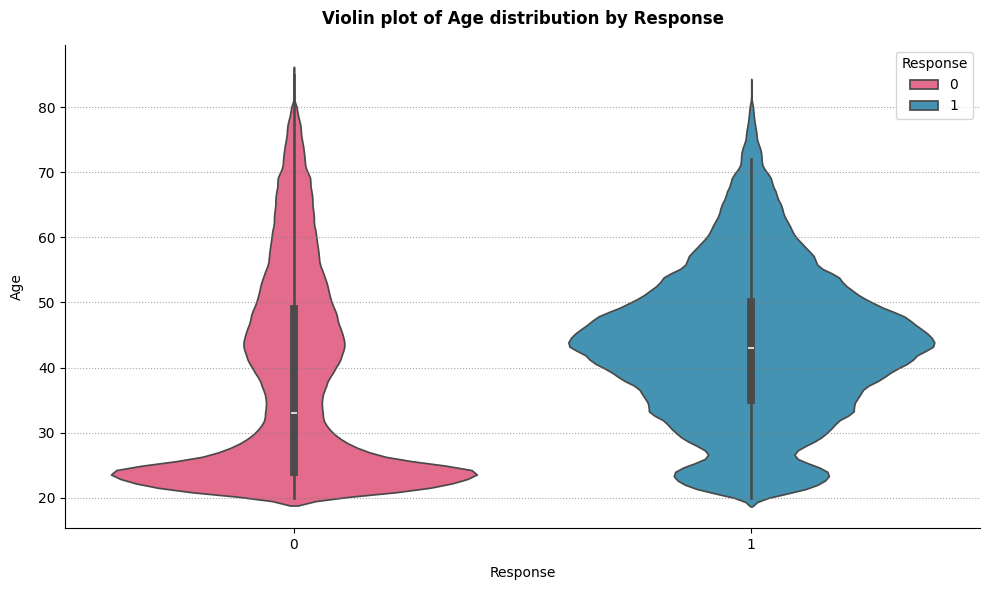

,Response,Count,Mean,Median,Std
1,1,1461769,31870.071541,34162.000000,17701.260534
0,0,10424138,30267.595721,31608.000000,16291.296369


🔎 D’Agostino and Pearson Normality Test for 'Annual_Premium' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 3418078.323
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 672795.958
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Annual_Premium' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6965772088034.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Annual_Premium' than Group '0'.


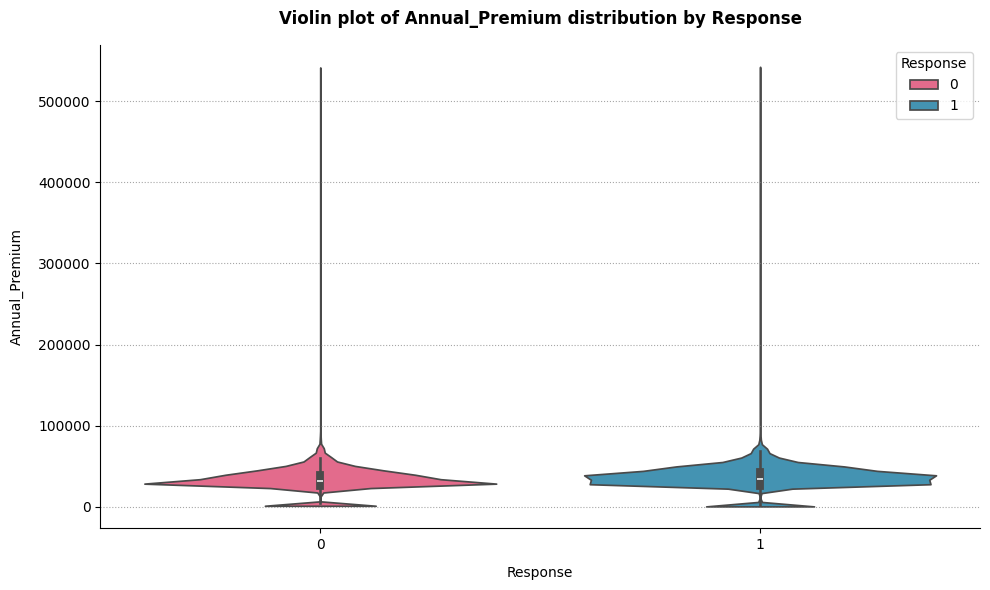

,Response,Count,Mean,Median,Std
0,0,10424138,164.032420,166.000000,80.249425
1,1,1461769,160.447398,163.000000,79.104988


🔎 D’Agostino and Pearson Normality Test for 'Vintage' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 5171133.620
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 470263.058
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Vintage' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7813027613593.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'Vintage' than Group '1'.


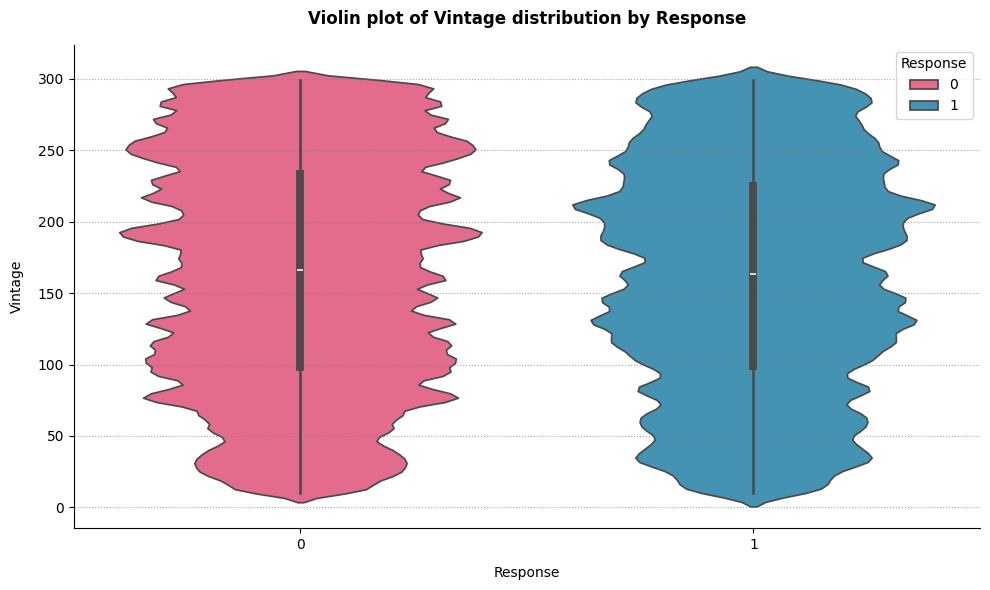

,Response,Count,Mean,Median,Std
1,1,1461769,26.860093,28.000000,11.297932
0,0,10424138,26.355700,28.000000,13.219205


🔎 D’Agostino and Pearson Normality Test for 'Region_Code' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 1298217.774
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 23735.852
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Region_Code' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7604639239654.0
p-value     : 0.0002091094380729255

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


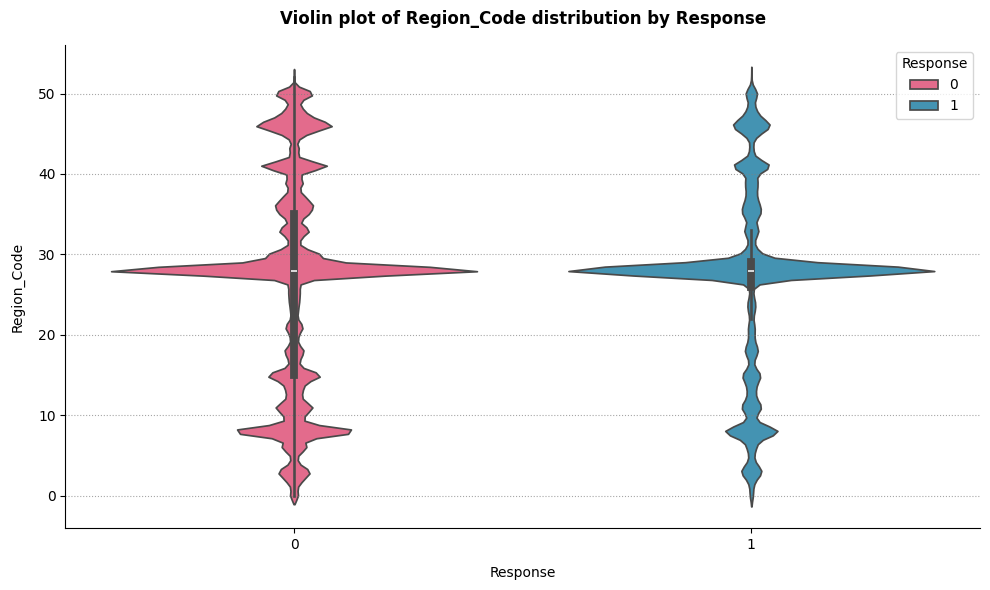

,Response,Count,Mean,Median,Std
0,0,10424138,115.494831,152.000000,53.050375
1,1,1461769,90.435094,124.000000,55.913655


🔎 D’Agostino and Pearson Normality Test for 'Policy_Sales_Channel' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 1850610.056
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 6006683.097
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Policy_Sales_Channel' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9576108797026.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'Policy_Sales_Channel' than Group '1'.


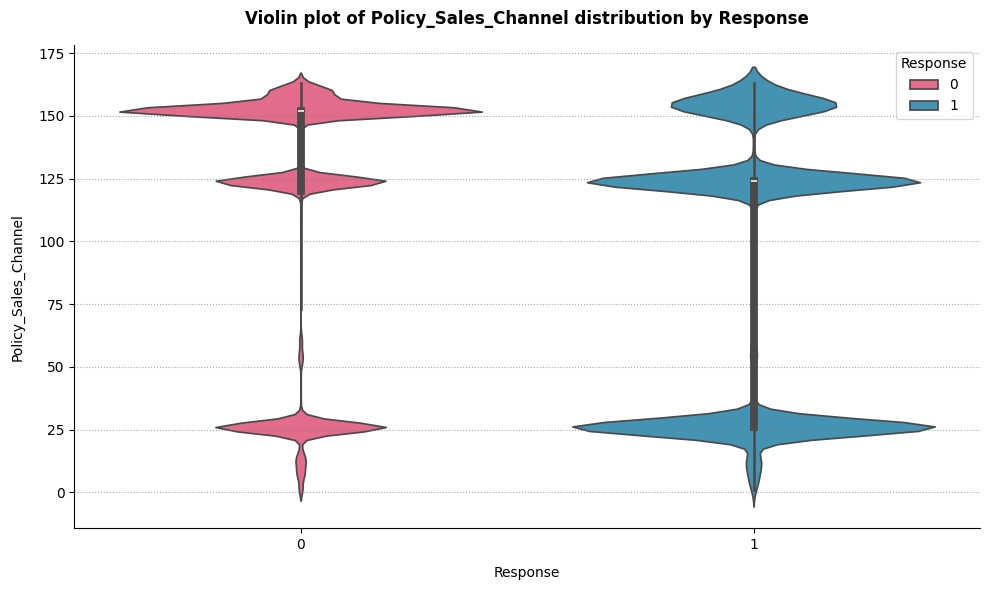

In [27]:
from IPython.core.display import HTML
targer_feature = "Response"
def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = targer_feature):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_targer_feature(feature, df_train = df_train, target_feature = targer_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by {targer_feature}</b></h2>"))
    plot_numerical_distribution_by_targer_feature(df_train=df_train, feature=feature)

### Insight Numerical Features vs loan_status

Based on the results from **Mann–Whitney U Test**. All numerical features have statistically significant associations with `Response` (p-value < 0.05)

**`Age`**

* The median age of **Group 1** (interested in the cross-sell product) is **higher** than that of Group 0.
* **Younger individuals** tend to be **less interested** in cross-sell products compared to older individuals.

**`Annual_Premium`**

* The median `Annual_Premium` of **Group 1** (interested in the cross-sell product) is **higher** than that of Group 0.
* This suggests that customers willing to engage with the cross-sell offer are often those with **higher insurance premium amounts**, potentially reflecting greater purchasing power.

**`Vintage`**

* The median `Vintage` of **Group 0** (not interested in the cross-sell product) is **higher** than that of Group 1.
* This indicates that customers who have been with the insurance company for a longer period tend to be **less interested** in the cross-sell product compared to newer customers.

**`Region_Code`**

* While the **medians** of `Region_Code` are **equal** for both groups, the **distributions differ** slightly.
* This indicates that the region where customers reside might have subtle variations in engagement with the cross-sell product, even though the central tendency is similar.

**`Policy_Sales_Channel`**

* The median `Policy_Sales_Channel` of **Group 0** (not interested in the cross-sell product) is **higher** than that of Group 1.
* This suggests that the sales channel may play an important role in attracting customers interested in the cross-sell product, with certain channels potentially having higher conversion effectiveness.

In [28]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0, target_var = "Response"):
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by {target_var}</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by "target_var"
    grouped = df.groupby([cat, target_var]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
    
    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=9)

    ax[0].set_title(f"Percentage of {target_var} by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel(f"% {target_var} Rate", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    # ax[0].grid(axis="y", color="gray", linestyle=":", linewidth=0.7)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = target_var, x = cat,
                palette=color(n_colors=2), ax=ax[1], order=percentages.index, hue_order = [0, 1])
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=9, weight="bold")

    ax[1].set_title(f"{target_var} by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title=target_var, bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rot)
    # ax[1].grid(axis="y", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature=target_var, df=df, show_residuals=True)

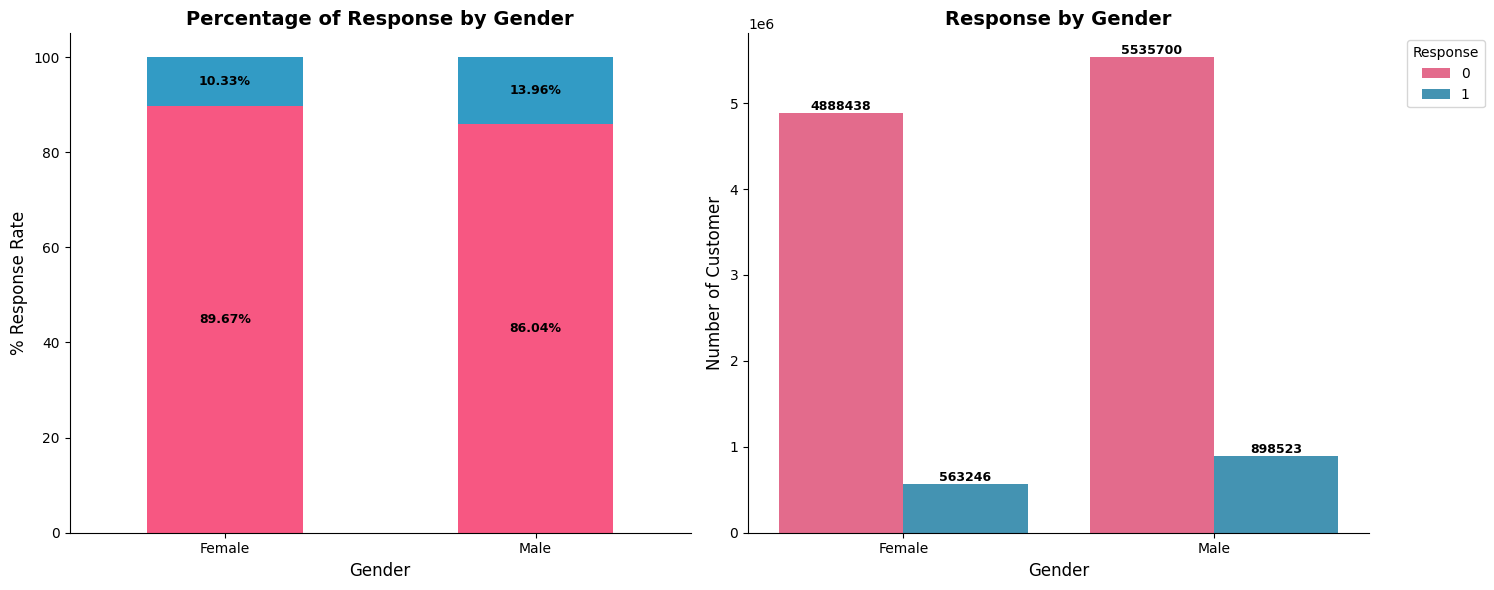


🔍 Chi-Square Test of Independence: 'Gender' vs. 'Response'
Chi-squared statistic: 36116.283
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Response'.

Standardized Residuals:
Response      0       1
Gender                 
Female    49.04 -130.95
Male     -45.14  120.53


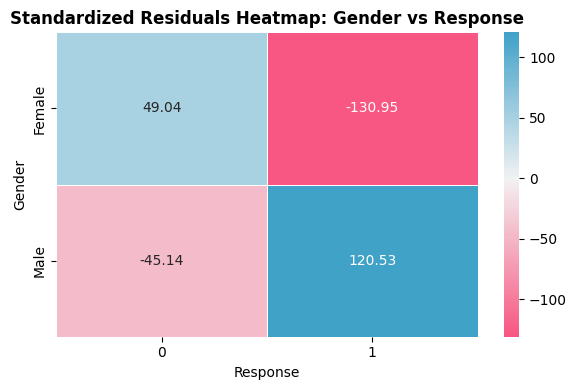

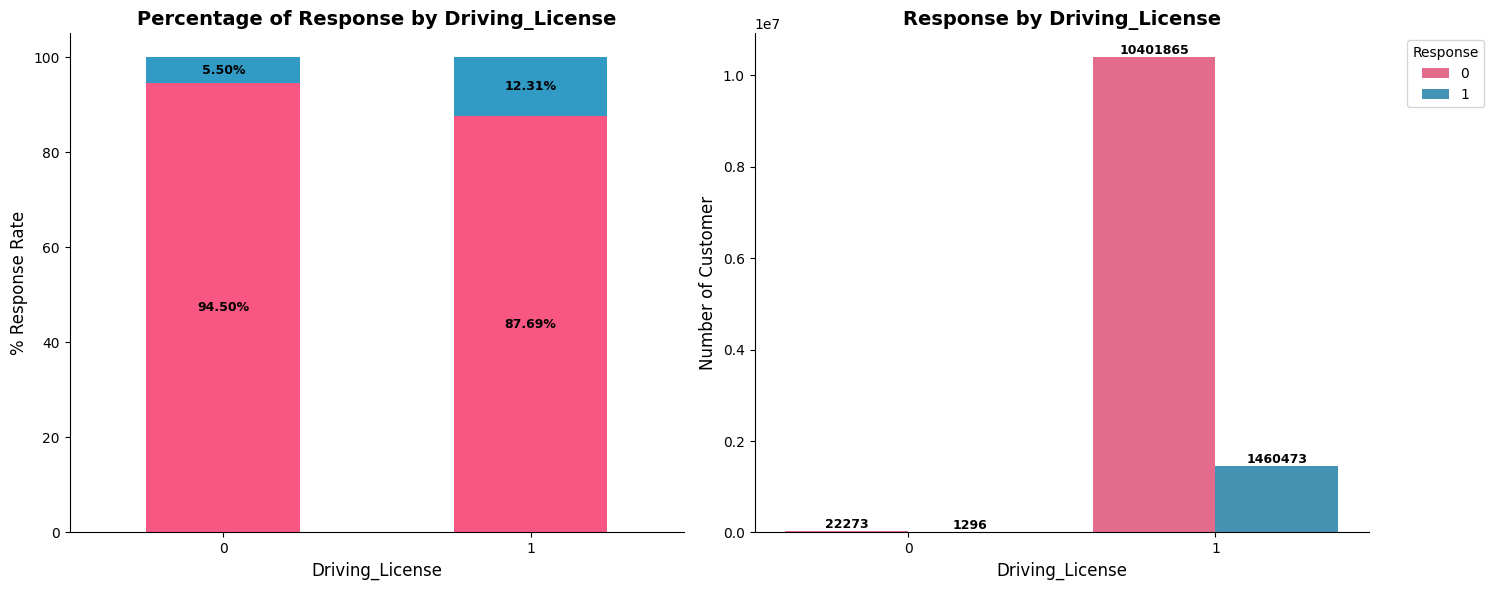


🔍 Chi-Square Test of Independence: 'Driving_License' vs. 'Response'
Chi-squared statistic: 1011.680
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Driving_License' and 'Response'.

Standardized Residuals:
Response             0      1
Driving_License              
0                11.15 -29.77
1                -0.50   1.33


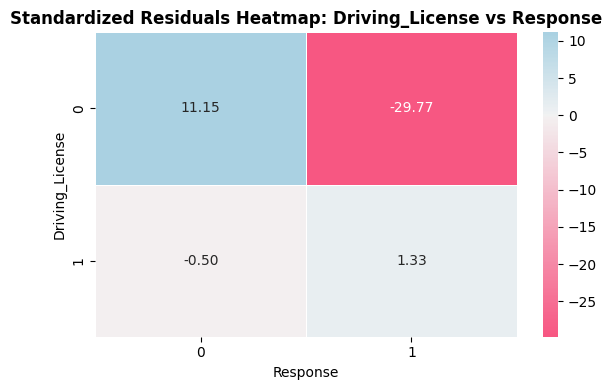

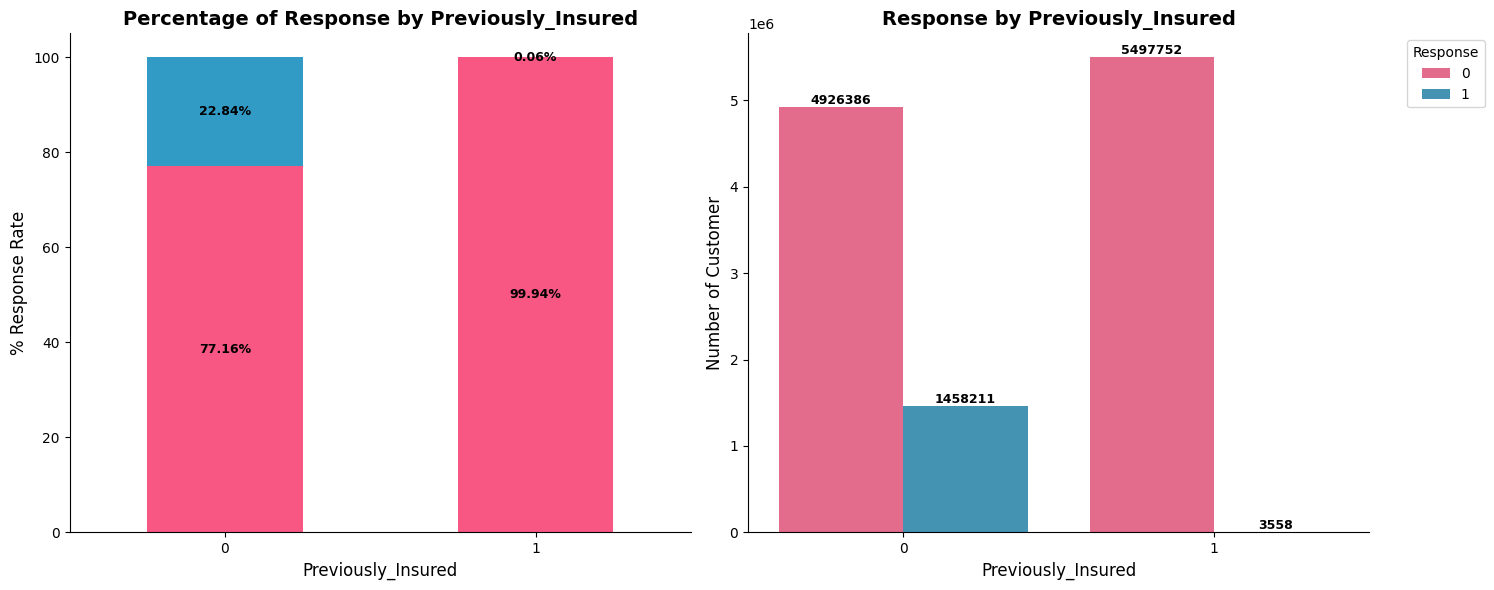


🔍 Chi-Square Test of Independence: 'Previously_Insured' vs. 'Response'
Chi-squared statistic: 1421094.789
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Previously_Insured' and 'Response'.

Standardized Residuals:
Response                 0       1
Previously_Insured                
0                  -284.41  759.51
1                   306.40 -818.21


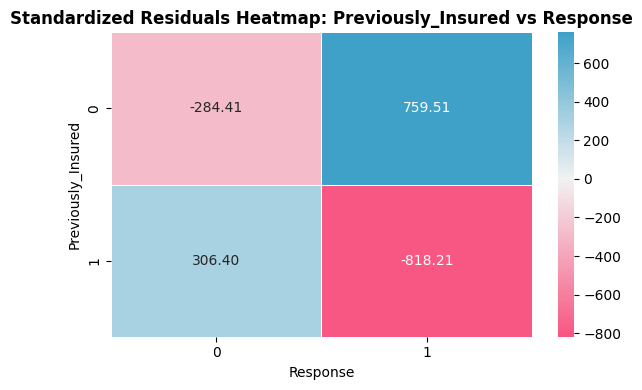

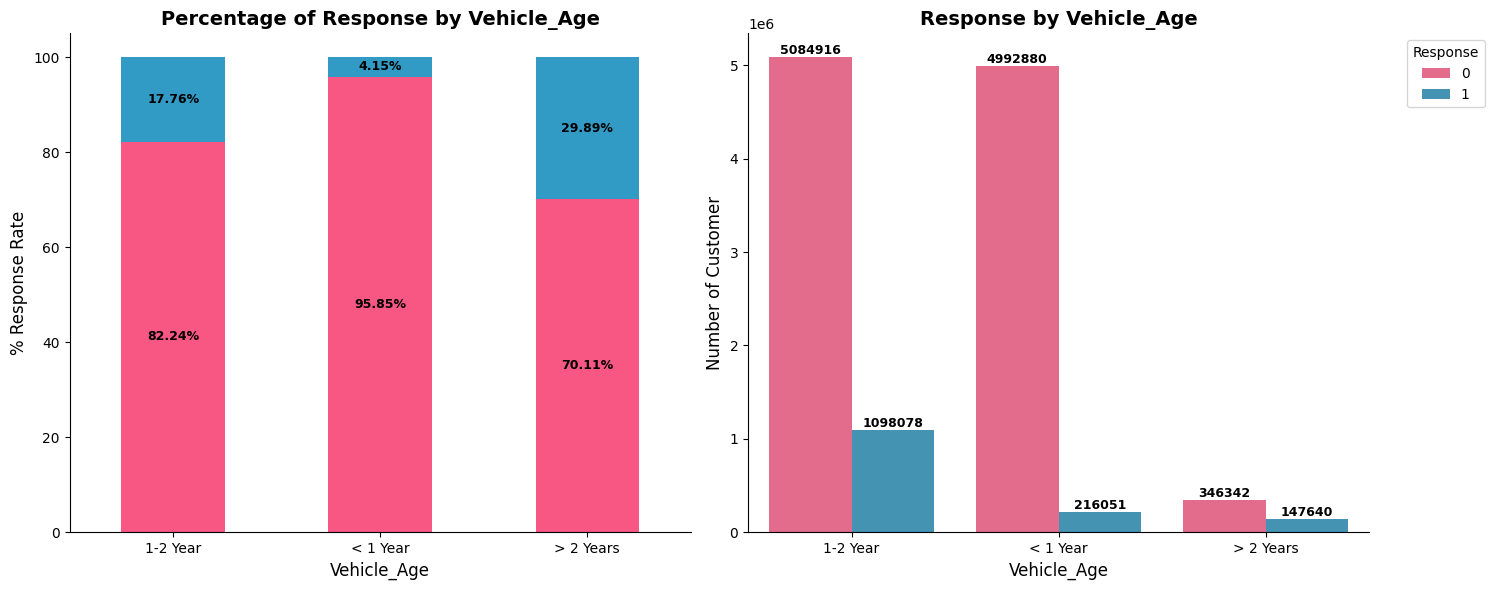


🔍 Chi-Square Test of Independence: 'Vehicle_Age' vs. 'Response'
Chi-squared statistic: 633505.198
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Vehicle_Age' and 'Response'.

Standardized Residuals:
Response          0       1
Vehicle_Age                
1-2 Year    -145.01  387.23
< 1 Year     198.64 -530.45
> 2 Years   -132.01  352.52


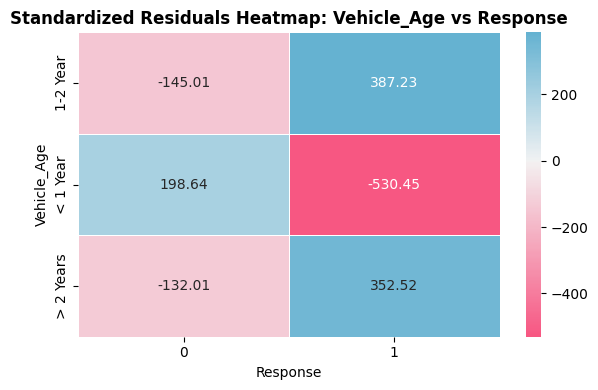

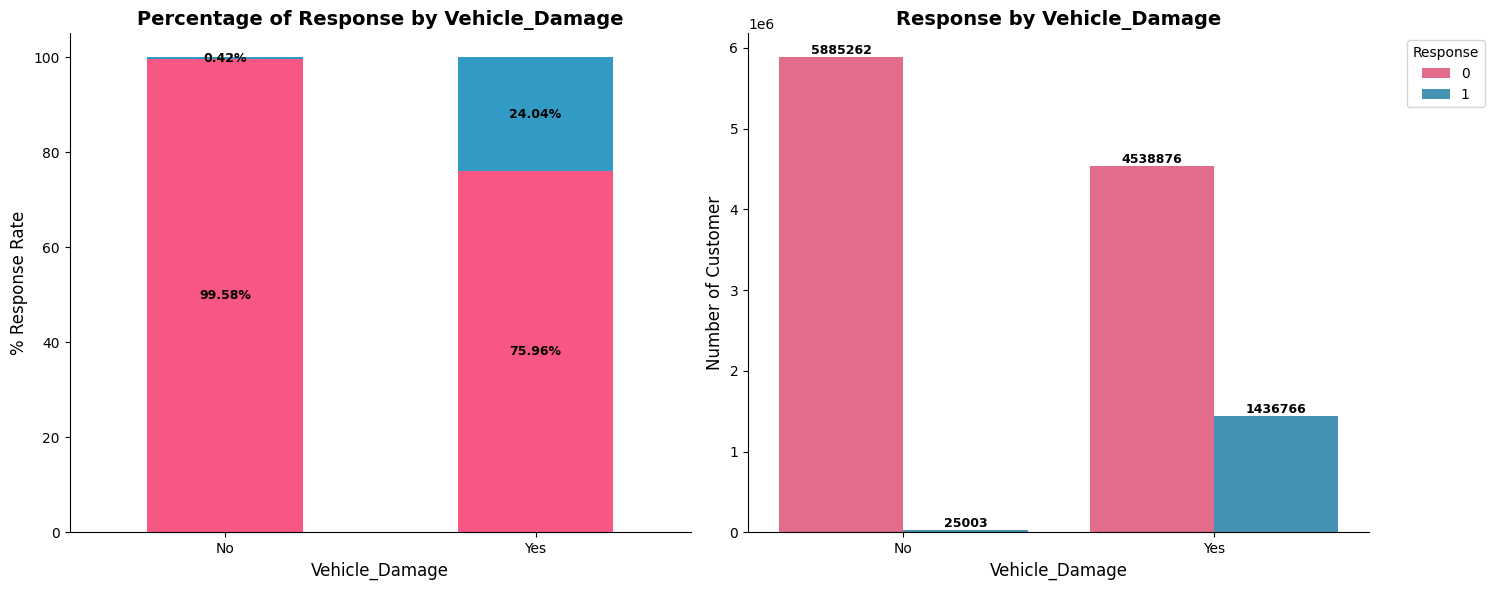


🔍 Chi-Square Test of Independence: 'Vehicle_Damage' vs. 'Response'
Chi-squared statistic: 1537052.157
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Vehicle_Damage' and 'Response'.

Standardized Residuals:
Response             0       1
Vehicle_Damage                
No              308.28 -823.24
Yes            -306.59  818.72


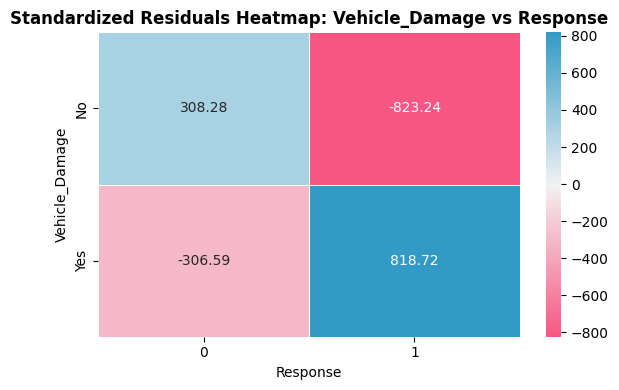

In [29]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features vs Response

**`Gender`**

* Male customers tend to be more interested in the cross-sell product compared to female customers.
* In contrast, female customers tend to be less interested in the cross-sell product.
* ⇒ This association is statistically significant (p-value < 0.05).

**`Driving_License`**

* Customers with a driving license are more interested in the cross-sell product compared to those without a driving license.
* ⇒ This association is statistically significant (p-value < 0.05).

**`Previously_Insured`**

* Customers who were **not previously insured** (`Previously_Insured = 0`) are **much more likely** to respond positively to the cross-sell offer (large positive residual for Response = 1).
* Customers who **already have insurance** (`Previously_Insured = 1`) are **much less likely** to respond positively (large negative residual for Response = 1).
* This suggests that prior insurance status is a **strong predictor** of cross-sell engagement.

**`Vehicle_Age`**

* Customers with **vehicles less than 1 year old** tend to be **less interested** in the cross-sell product (very large negative residual for Response = 1).
* In contrast, customers with **vehicles aged 1–2 years** or **more than 2 years** are **more likely** to be interested in the cross-sell product (large positive residuals for Response = 1).

**`Vehicle_Damage`**

* Customers whose vehicles **have experienced damage** are **much more likely** to be interested in the cross-sell product (very large positive residual for Response = 1).
* Customers whose vehicles **have not been damaged** are **much less likely** to show interest (very large negative residual for Response = 1).


**Summary table**

| Feature                    | Key Insight                                                                                            | Statistical Significance |
| -------------------------- | ------------------------------------------------------------------------------------------------------ | ------------------------ |
| **Gender**                 | Male customers are more interested in cross-sell products, while female customers are less interested. | p-value < 0.05           |
| **Driving\_License**       | Customers with a driving license show more interest than those without.                                | p-value < 0.05           |
| **Previously\_Insured**    | Not previously insured → much more likely to respond positively; Already insured → much less likely.   | p-value < 0.05           |
| **Vehicle\_Age**           | Vehicles < 1 year → less interest; Vehicles 1–2 years or > 2 years → more interest.                    | p-value < 0.05           |
| **Vehicle\_Damage**        | Damaged vehicles → much more interest; No damage → much less interest.                                 | p-value < 0.05           |
| **Age**                    | Older customers are more interested; younger customers less so.                                        | p-value < 0.05           |
| **Annual\_Premium**        | Higher premiums → more interest, possibly due to greater purchasing power.                             | p-value < 0.05           |
| **Vintage**                | Longer-tenure customers less interested; newer customers more interested.                              | p-value < 0.05           |
| **Region\_Code**           | Medians equal, but distribution differs slightly by region.                                            | p-value < 0.05           |
| **Policy\_Sales\_Channel** | Lower median sales channel code linked to more interest; channel effectiveness may vary.               | p-value < 0.05           |


## Multivariate Analysis (Let's address some business questions)

In [30]:
df_train_ba = df_train.copy()

In [31]:
df_train.drop("id", axis=1, inplace=True)
df_origin.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

### Are male customers, not previously insured, and owning vehicles aged 1–2 years the segment with the highest response rate?

**Objective**: Identify the “sweet spot” customer segment to prioritize marketing efforts.

In [32]:
df_train_ba["Male_PreviouslyInsured0_Vehicle1_2Year"] = (
    (df_train_ba["Gender"] == "Male") &
    (df_train_ba["Previously_Insured"] == 0) &
    (df_train_ba["Vehicle_Age"] == "1-2 Year")
)

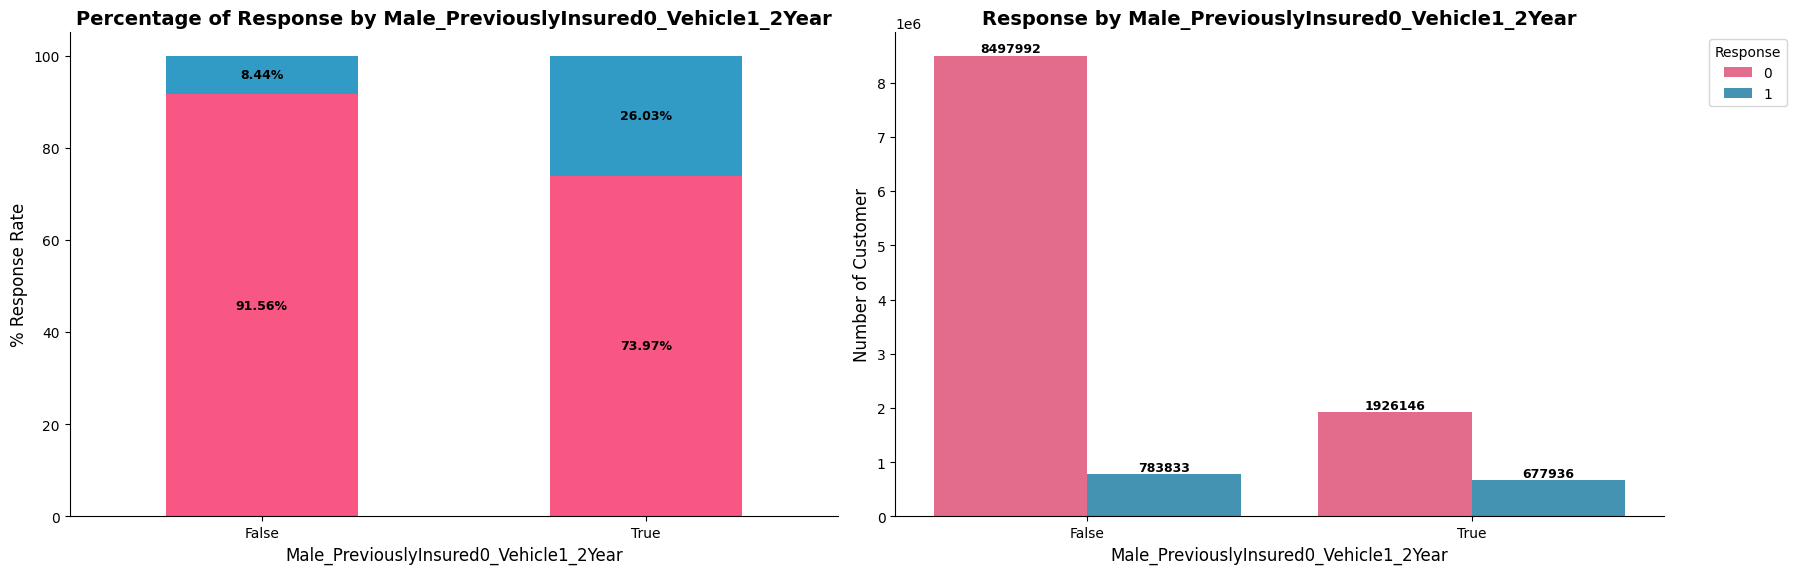


🔍 Chi-Square Test of Independence: 'Male_PreviouslyInsured0_Vehicle1_2Year' vs. 'Response'
Chi-squared statistic: 583272.293
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Male_PreviouslyInsured0_Vehicle1_2Year' and 'Response'.

Standardized Residuals:
Response                                     0       1
Male_PreviouslyInsured0_Vehicle1_2Year                
False                                   125.36 -334.77
True                                   -236.68  632.03


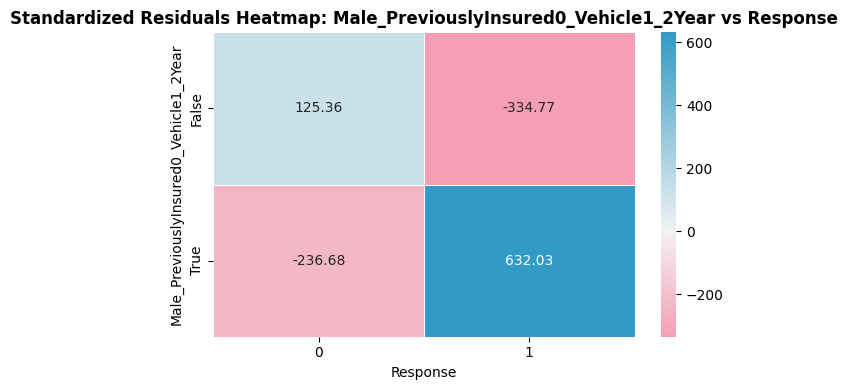

In [33]:
bivariate_percent_plot(cat="Male_PreviouslyInsured0_Vehicle1_2Year", df=df_train_ba, figsize=(18, 6))

**Answer:**

* Male customers who have never had insurance and own vehicles aged 1–2 years show a significantly higher cross-sell response rate (26.03%) compared to the rest of the group (8.44%).
* Statistical testing (Chi-Square, p-value < 0.05) confirms that this is a notable association – identifying this segment as a high-potential customer group that should be prioritized in cross-sell campaigns.

### How does the combination of **customer age (Age)** and **vehicle damage history (Vehicle\_Damage)** affect the likelihood of purchasing the cross-sell product?

**Objective**: Understand whether age and damage history together create a significant difference in response rates.

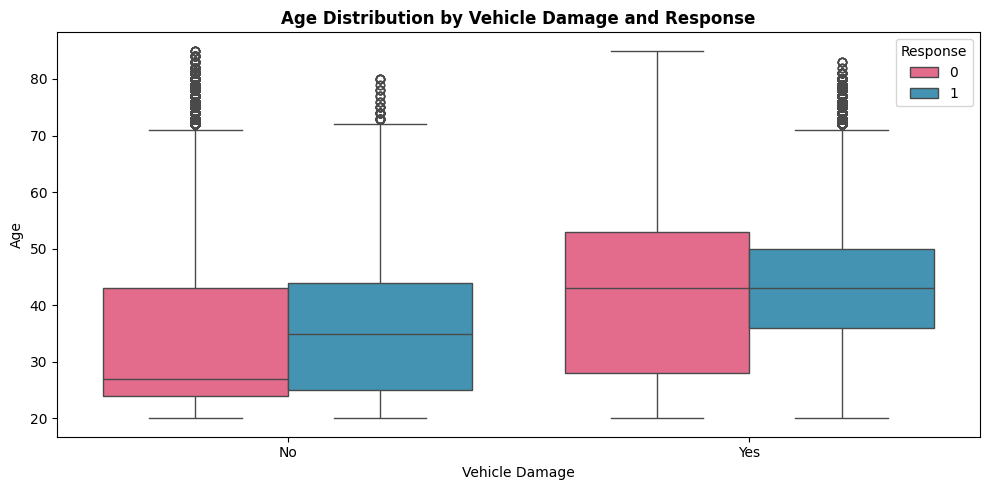

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train_ba, x="Vehicle_Damage", y="Age", hue="Response", palette=color(n_colors=2))

plt.title("Age Distribution by Vehicle Damage and Response", weight = "bold")
plt.xlabel("Vehicle Damage")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

**Answer**

* The relationship between **customer age (Age)** and **vehicle damage status (Vehicle\_Damage)** appears to influence the likelihood of purchasing the cross-sell product. <br>
→ Customers whose vehicles **have experienced damage** tend to be **older** compared to those whose vehicles have **never been damaged**.

### Can **Annual\_Premium** combined with **Vintage** help predict the Customer Lifetime Value (CLV)?

**Objective**: Estimate the long-term revenue potential from customers likely to purchase the cross-sell product.

**Note:**

* `gross_margin`, `discount_rate`, and `retention_rate` are **business parameters** — adjust based on actual business context.

* In this dataset, `Vintage` is typically the **number of days** of customer tenure; if measured in months, replace `365.0` with `12.0`.

* **Full CLV formula** combines the realized margin (past) and expected future margin:

  $$
  \text{CLV} = \underbrace{AP \times GM \times \text{tenure\_years}}_{\text{Realized Margin}} + \underbrace{AP \times GM \times \frac{r}{1 + d - r}}_{\text{Future Margin}}
  $$

  Where:

  * **AP** = `Annual_Premium` → Annual insurance premium (monetary unit/year)
  * **GM** = `gross_margin` → Gross margin (% of AP)
  * **r** = `retention_rate` → Policy renewal rate (%/year)
  * **d** = `discount_rate` → Discount rate (%/year)
  * **tenure\_years** = `Vintage` converted to years (days ÷ 365 or months ÷ 12)

* The **Future Margin** term assumes a constant retention rate and uses the sum of an infinite geometric series.

* Optional refinement: estimate `retention_rate` separately for different customer segments (e.g., by `Vehicle_Age`, `Previously_Insured`, `Vehicle_Damage`) and plug into the formula for more tailored CLV estimates.

In [35]:
def compute_clv(
    data: pd.DataFrame,
    annual_premium_col: str = "Annual_Premium",
    vintage_col: str = "Vintage",
    gross_margin: float = 0.35,   # Gross profit margin on premium
    discount_rate: float = 0.10,  # Annual discount rate
    retention_rate: float = 0.80  # Annual renewal probability (assumption)
) -> pd.DataFrame:
    """
    Estimated CLV = realized_margin_to_date + expected_future_margin

      realized_margin_to_date = Annual_Premium * gross_margin * tenure_years
      expected_future_margin  = Annual_Premium * gross_margin * retention_rate / (1 + discount_rate - retention_rate)

    Vintage is assumed to be in DAYS → converted to years.
    """
    dfc = data.copy()
    # Convert days of tenure to years
    dfc["tenure_years"] = dfc[vintage_col] / 365.0
    # Realized margin so far
    dfc["realized_margin"] = dfc[annual_premium_col] * gross_margin * dfc["tenure_years"]
    # Multiplier for expected future margin
    multiplier = retention_rate / (1.0 + discount_rate - retention_rate)
    # Expected future margin
    dfc["future_margin_expected"] = dfc[annual_premium_col] * gross_margin * multiplier
    # Estimated CLV
    dfc["CLV_est"] = dfc["realized_margin"] + dfc["future_margin_expected"]
    return dfc

compute_clv(data=df_train_ba).head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male_PreviouslyInsured0_Vehicle1_2Year,tenure_years,realized_margin,future_margin_expected,CLV_est
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,True,0.512329,11673.590274,60760.933333,72434.523607
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,False,0.789041,16269.120000,54983.600000,71252.720000
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,False,0.695890,9265.815616,35506.800000,44772.615616
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,False,0.208219,191.665753,2454.666667,2646.332420
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,False,0.805479,9007.555890,29820.933333,38828.489224


**Answer**

Based on **Annual\_Premium** and **Vintage**, we can estimate the **Customer Lifetime Value (CLV)**.
However, due to the limitations of the dataset (no information on costs, interest rates, or actual policy renewal rates), the parameters **gross\_margin**, **discount\_rate**, and **retention\_rate** need to be **assumed or determined based on industry data** to complete the CLV formula.

### Is there a significant interaction between **Region\_Code** and **Policy\_Sales\_Channel** in influencing response rates?

**Objective**: Determine which sales channels should be prioritized in each region to maximize conversion rates. 

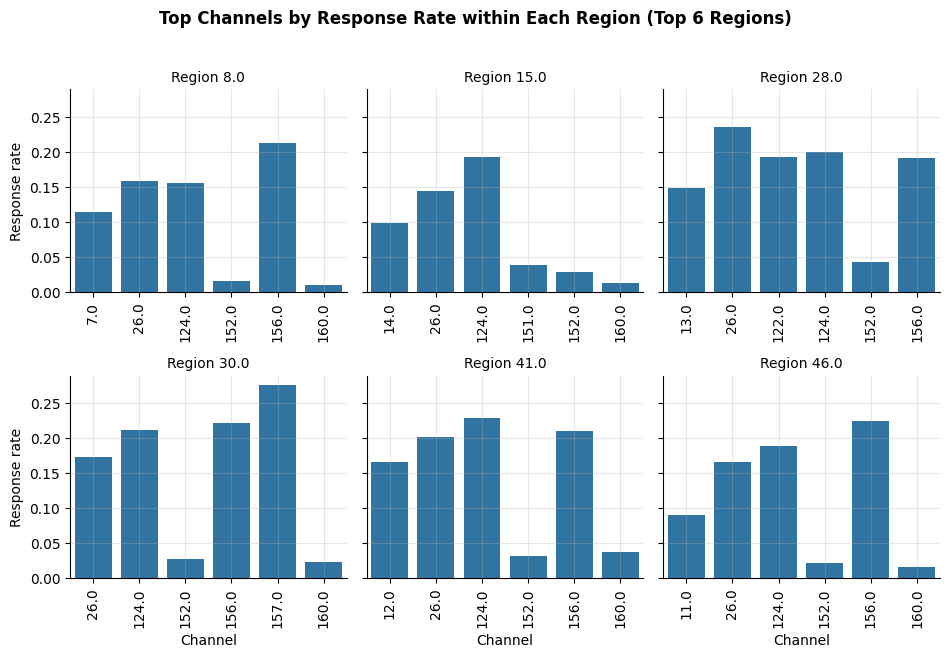

In [36]:
# Compute response rate and volume by region–channel
grp = (df.groupby(["Region_Code","Policy_Sales_Channel"])
         .agg(resp_rate=("Response","mean"), volume=("Response","size"))
         .reset_index())

# Filter the top 6 channels by volume for each region (and keep only the top 6 regions by volume)
top_regions = df["Region_Code"].value_counts().head(6).index
grp = grp[grp["Region_Code"].isin(top_regions)].copy()

grp["rank_in_region"] = grp.groupby("Region_Code")["volume"].rank(method="first", ascending=False)
grp_top = grp[grp["rank_in_region"] <= 6]

# Plot facet bar chart
g = sns.FacetGrid(grp_top, col="Region_Code", col_wrap=3, height=3.2, sharex=False, sharey=True)
g.map_dataframe(sns.barplot, x="Policy_Sales_Channel", y="resp_rate", order=None)
g.set_titles("Region {col_name}")
g.set_axis_labels("Channel", "Response rate")
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=90)
    ax.grid(alpha=0.3)
plt.suptitle("Top Channels by Response Rate within Each Region (Top 6 Regions)", y=1.02, weight="bold")
plt.tight_layout()
plt.show()

**Answer**

Based on the chart **“Top Channels by Response Rate within Each Region (Top 6 Regions)”**, there are clear signs of **interaction** between `Region_Code` and `Policy_Sales_Channel` in driving the response rate.

* **Channel effectiveness varies by region** (there is no “one-size-fits-all”):

  * **Region 8**: channel **156** stands out (\~21%); **152/160** are low.
  * **Region 15**: channel **124** is highest (\~19–20%); **160** is very low.
  * **Region 28**: channel **26** is dominant (\~23–24%).
  * **Region 30**: channel **157** is highest (\~27–28%); **156** is also high (\~22%); **152/160** are low.
  * **Region 41**: channel **124** leads (\~23%); **152/160** are low.
  * **Region 46**: channel **156** stands out (\~22–23%); **152/160** are low.

* **Notable recurring patterns**:

  * **124** frequently appears among the top channels (Regions 8, 15, 30, 41, 46).
  * **26** is strong in several places (28, 46; also decent in 8).
  * **152 and 160** are generally **weak** across most shown regions.

### Do customers with **high Annual\_Premium** but **vehicles less than 1 year old** really show less interest in cross-sell compared to those with older vehicles?

**Objective**: Test a potential paradox in the data.

In [37]:
# High Premium threshold = top 25%
q75 = df_train_ba["Annual_Premium"].quantile(0.75)
df_train_ba["High_Premium"] = df_train_ba["Annual_Premium"] >= q75

# Response rate by Vehicle_Age x High_Premium
resp_rate = (
    df_train_ba.groupby(["Vehicle_Age", "High_Premium"])["Response"]
    .mean()
    .rename("response_rate")
    .reset_index()
)

# Include the median premium of each group for comparison
med_tbl = (
    df_train_ba.groupby(["Vehicle_Age", "High_Premium"])["Annual_Premium"]
    .median()
    .rename("median_premium")
    .reset_index()
)

result = resp_rate.merge(med_tbl, on=["Vehicle_Age", "High_Premium"])
print("\nResponse rate & median premium by Vehicle_Age x High_Premium:")
print(result.sort_values(["Vehicle_Age", "High_Premium"]))


Response rate & median premium by Vehicle_Age x High_Premium:
  Vehicle_Age  High_Premium  response_rate  median_premium
0    1-2 Year         False       0.173569         28578.0
1    1-2 Year          True       0.187292         47413.0
2    < 1 Year         False       0.039945         29092.0
3    < 1 Year          True       0.048534         46966.0
4   > 2 Years         False       0.264364         28702.0
5   > 2 Years          True       0.339271         48610.0


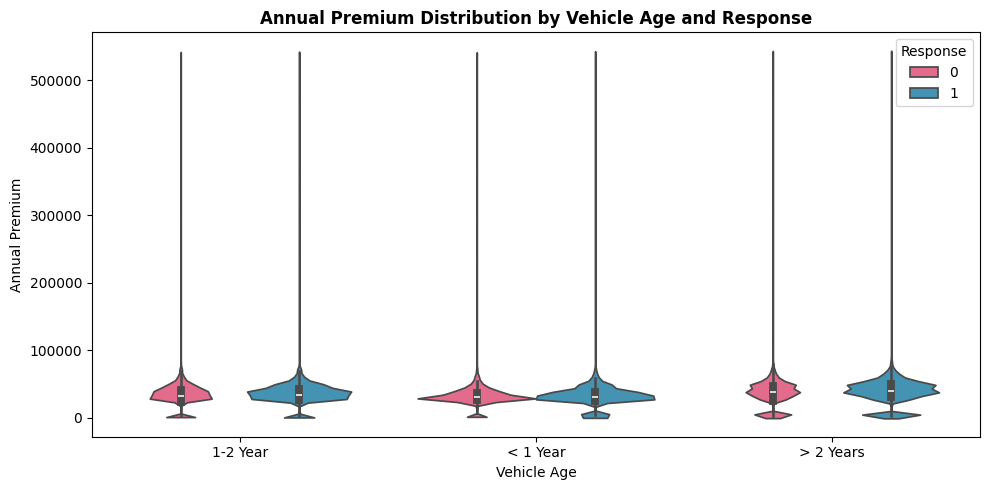

In [38]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_train_ba, x="Vehicle_Age", y="Annual_Premium", hue="Response", palette=color(n_colors=2))

plt.title("Annual Premium Distribution by Vehicle Age and Response", weight = "bold")
plt.xlabel("Vehicle Age")
plt.ylabel("Annual Premium")
plt.tight_layout()
plt.show()

**Answer**

* **High premiums alone are not enough** to drive interest in cross-sell among owners of **new vehicles (< 1 year)**. This could be because they **don’t yet feel the need** for additional insurance products, or **haven’t developed trust** with the provider.
* Meanwhile, customers with **older vehicles** and high premiums show **strong interest**, suggesting a clearer link between premium value and cross-sell engagement.

### Can the combination of **Driving\_License** and **Previously\_Insured** create a particularly high-potential customer segment?

**Objective:** Identify overlooked customer groups with high potential value.

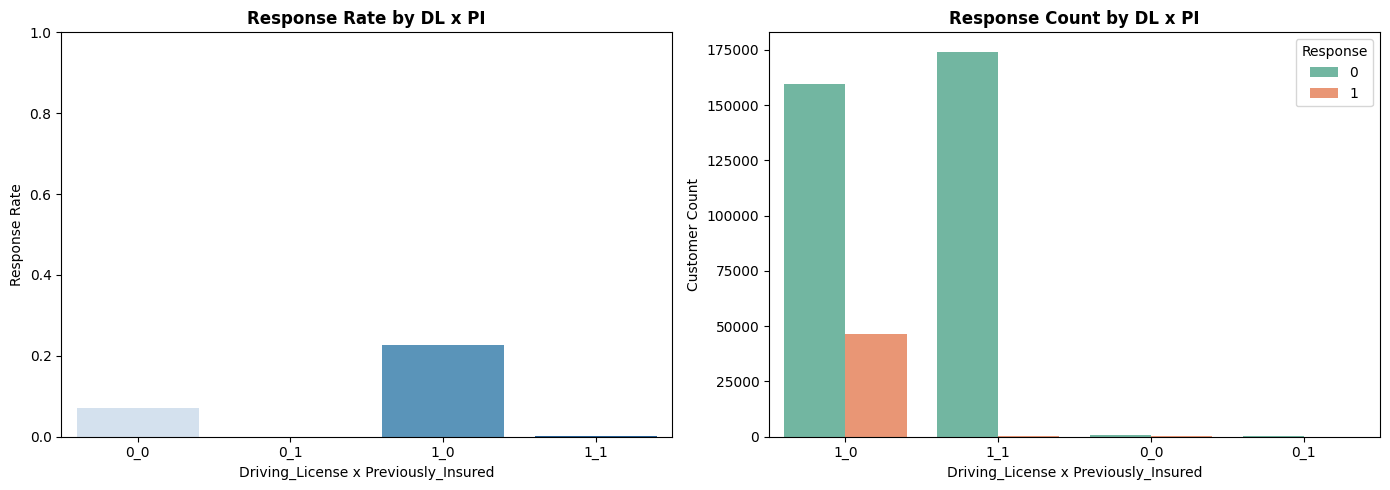

In [39]:
# Create a combined column: Driving_License x Previously_Insured
df["DLxPI"] = df["Driving_License"].astype(str) + "_" + df["Previously_Insured"].astype(str)

# Calculate response rate for each combined group
grouped = (
    df.groupby("DLxPI")["Response"]
    .mean()
    .reset_index()
    .rename(columns={"Response": "response_rate"})
)

# Create a figure with 2 subplots side by side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1: Barplot (Response Rate) ---
sns.barplot(data=grouped, x="DLxPI", y="response_rate", ax=axes[0], palette="Blues")
axes[0].set_title("Response Rate by DL x PI", weight="bold")
axes[0].set_xlabel("Driving_License x Previously_Insured")
axes[0].set_ylabel("Response Rate")
axes[0].set_ylim(0, 1)

# --- Subplot 2: Countplot (Customer count by Response) ---
sns.countplot(data=df, x="DLxPI", hue="Response", ax=axes[1], palette="Set2")
axes[1].set_title("Response Count by DL x PI", weight="bold")
axes[1].set_xlabel("Driving_License x Previously_Insured")
axes[1].set_ylabel("Customer Count")

# Display the combined plots
plt.tight_layout()
plt.show()

**Answer**

1. Group Combinations and Behavioral Meaning

| Driving\_License | Previously\_Insured | Group | Interpretation                                               |
| ---------------- | ------------------- | ----- | ------------------------------------------------------------ |
| 0                | 0                   | `0_0` | No license & not previously insured                          |
| 0                | 1                   | `0_1` | No license & previously insured                              |
| 1                | 0                   | `1_0` | Has license & not previously insured →  **high potential** |
| 1                | 1                   | `1_1` | Has license & previously insured →  cross-sell resistant   |

2. Detailed Analysis from the Plots

**Group `1_0` (Has License & Not Previously Insured)**

* **Highest response rate (\~23%)** – significantly stands out from other groups.
* **Very large customer base** (\~200,000 people according to the countplot).
* ➤ **This is a highly promising segment for cross-sell**:

  * Customers are eligible to drive.
  * They have no prior insurance → likely in need of an insurance product.
  * Possibly first-time drivers or recent car owners → may be looking for coverage.

**Group `1_1` (Has License & Previously Insured)**

* **Almost zero response rate**.
* **Largest customer group** (\~175,000).
* ➤ This group is **not responsive to the current cross-sell offer**:

  * They may already be satisfied with their existing policy.
  * Might require a different strategy: upsell, premium bundles, or unique add-ons.

**Groups `0_1` and `0_0` (No License)**

* **Extremely small proportions**, nearly negligible.
* **Very low or zero response rates**.
* ➤ Not worth targeting aggressively — possibly:

  * Minors, non-drivers, or dependents listed under someone else's policy.
  * Invalid or unsuitable records for current cross-sell offerings.

Conclusion: Can This Combination Create a High-Potential Segment?

**→ Yes. The `1_0` group clearly represents a high-potential cross-sell target**:

* They are eligible to drive.
* They are uninsured — meaning they are not committed elsewhere.
* They show strong interest in the current offer.
* The group is large enough to justify targeted marketing efforts.

### What is the difference in response rates between **long-tenure customers with new vehicles** and **new customers with old vehicles**?

**Objective:** Determine which factor matters more — customer tenure or vehicle age.

In [40]:
def label_segment(row):
    if row["Age"] >= 40 and row["Vehicle_Age"] == "< 1 Year":
        return "Old_Person_New_Car"
    elif row["Age"] < 40 and row["Vehicle_Age"] == "< 2 Year":
        return "Young_Person_Old_Car"
    else:
        return "Other"

df_train_ba["PersonCarSegment"] = df_train_ba.apply(label_segment, axis=1)

segment_stats = (
    df_train_ba[df_train_ba["PersonCarSegment"] != "Other"]
    .groupby("PersonCarSegment")["Response"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "response_rate", "count": "num_customers"})
    .reset_index()
)
print(segment_stats)

     PersonCarSegment  response_rate  num_customers
0  Old_Person_New_Car       0.151311          20633


In [41]:
df_train_ba["PersonCarSegment"].value_counts()

PersonCarSegment
Other                 11865274
Old_Person_New_Car       20633
Name: count, dtype: int64

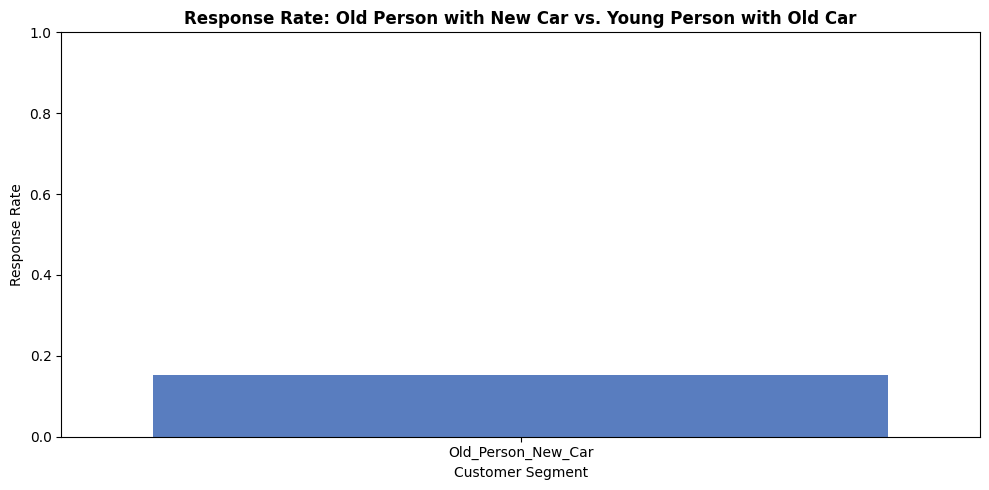

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(data=segment_stats, x="PersonCarSegment", y="response_rate", palette="muted")
plt.title("Response Rate: Old Person with New Car vs. Young Person with Old Car", weight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Response Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Answer**

* **Group “Old\_Person\_New\_Car”** (older individuals with new cars):

  * Count: **20,633** customers.
  * **Response rate \~15–16%** (based on the bar plot).

* **Group “Young\_Person\_Old\_Car”** (younger individuals with old cars):

  * **Not present** in the dataset (count = 0).
  * This might be due to the filtering criteria (e.g., `Age < 40` and `Vehicle_Age = '> 2 Years'`) not matching any records, or because such cases are rare in the data.

**Interpretation**

* Since the **“Young\_Person\_Old\_Car”** group does not exist in the dataset, we **cannot directly compare** the response rates between the two groups.
* From the current data, the “Old\_Person\_New\_Car” group still shows a **relatively high response rate** (\~15–16%) compared to the overall average, suggesting it **could** be a segment worth targeting.
* However, **the difference cannot be quantified** without sufficient data for the comparison group.

### When combining **Age**, **Annual\_Premium**, and **Policy\_Sales\_Channel**, which customer group yields the highest response rate?

**Objective**: Build a multi-variable target customer profile for campaign targeting

Overall response rate: 0.123

Top groups by response rate (min_n = 200):
     Age_Group Premium_Group  Policy_Sales_Channel  response_rate  \
932      30-39        Medium                 158.0       0.448413   
935      30-39        Medium                 163.0       0.409857   
921      30-39        Medium                 147.0       0.402256   
617      30-39          High                 155.0       0.401829   
938      40-49          High                   3.0       0.395768   
929      30-39        Medium                 155.0       0.391575   
620      30-39          High                 158.0       0.389513   
773      30-39           Low                 155.0       0.383772   
1250     40-49        Medium                   3.0       0.379504   
1400     40-49        Medium                 158.0       0.377005   

      num_customers      lift  
932             504  3.646124  
935            9374  3.332621  
921             266  3.270813  
617            1859  3.267343  
938    

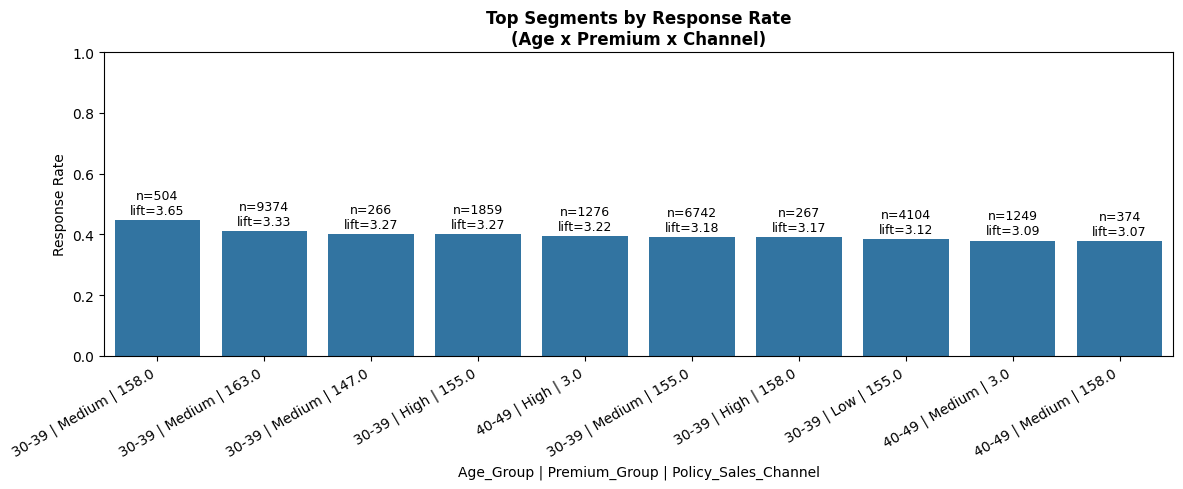

In [43]:
# ==== 1) Bin Age (same as your original) ====
df_train_ba["Age_Group"] = pd.cut(
    df_train_ba["Age"],
    bins=[0, 30, 40, 50, 60, np.inf],
    labels=["<30", "30-39", "40-49", "50-59", "60+"],
    right=False
)

# (Optional) Use qcut to split into age quartiles:
# df_train_ba["Age_Group"] = pd.qcut(df_train_ba["Age"], q=5, duplicates="drop")

# ==== 2) Bin Annual_Premium (Q1/Q3) ====
q25 = df_train_ba["Annual_Premium"].quantile(0.25)
q75 = df_train_ba["Annual_Premium"].quantile(0.75)

def premium_group(p):
    if p < q25:
        return "Low"
    elif p < q75:
        return "Medium"
    else:
        return "High"

df_train_ba["Premium_Group"] = df_train_ba["Annual_Premium"].apply(premium_group)

# ==== 3) Calculate response_rate by the triplet ====
grouped = (
    df_train_ba
    .groupby(["Age_Group", "Premium_Group", "Policy_Sales_Channel"], dropna=False)["Response"]
    .agg(response_rate="mean", num_customers="count")
    .reset_index()
)

# ==== 4) Filter out small groups + calculate lift ====
overall_rate = df_train_ba["Response"].mean()
min_n = 200        # adjust as needed
top_n = 10

ranked = (
    grouped.assign(lift=lambda d: d["response_rate"] / overall_rate)
           .query("num_customers >= @min_n")
           .sort_values(["response_rate", "num_customers"], ascending=[False, False])
)

print("Overall response rate:", round(overall_rate, 4))
print("\nTop groups by response rate (min_n = %d):" % min_n)
print(ranked.head(top_n))

# ==== 5) (Optional) Plot Top-N barplot ====
plot_df = ranked.head(top_n).copy()
plot_df["segment"] = (
    plot_df["Age_Group"].astype(str) + " | " +
    plot_df["Premium_Group"].astype(str) + " | " +
    plot_df["Policy_Sales_Channel"].astype(str)
)

plt.figure(figsize=(12, 5))
sns.barplot(data=plot_df, x="segment", y="response_rate")
plt.title("Top Segments by Response Rate\n(Age x Premium x Channel)", weight="bold")
plt.ylabel("Response Rate")
plt.xlabel("Age_Group | Premium_Group | Policy_Sales_Channel")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1)
# annotate number of customers & lift
for i, row in plot_df.reset_index().iterrows():
    plt.text(i, row["response_rate"] + 0.01,
             f"n={row['num_customers']}\nlift={row['lift']:.2f}",
             ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

**Answer**

**Highest Response Rate Segment**

* **Segment:** `30-39 | Medium | 158.0`
* **Response Rate:** \~0.50 (3.65 times higher than the overall average — lift = 3.65)
* **Customer Count (n):** 504
  → This group combines an extremely high response rate with a sufficiently large customer base to be noteworthy.

**Other High-Performing Segments**

* `30-39 | Medium | 163.0` → High response rate (lift = 3.33), n = 9,374 → **very large scale**, ideal for wide-reaching campaigns.
* `30-39 | Medium | 147.0` → Lift = 3.27, n = 266 → small group but high quality.
* `30-39 | High | 155.0` → Lift = 3.27, n = 1,859.
* `40-49 | High | 3.0` → Lift = 3.22, n = 1,276.

**Business Implications**

* **Age group 30–39** dominates the Top 10 and is particularly effective when combined with **Medium to High premiums**.
* **Policy\_Sales\_Channel 158.0** appears multiple times in the Top list → this may be a particularly effective sales channel for this demographic.
* Groups with **large n** such as `30-39 | Medium | 163.0` can generate significant business impact for cross-sell campaigns.
* Groups with **small n but high lift** (such as `30-39 | Medium | 158.0`) are suitable for pilot programs or premium product offerings.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Feature Engineering

In [44]:
# Premium_per_Vintage
df_train["Premium_per_Vintage"] = df_train["Annual_Premium"] / df_train["Vintage"]
df_test["Premium_per_Vintage"] = df_test["Annual_Premium"] / df_test["Vintage"]

# VehicleAge_x_VehicleDamage
df_train["VehicleAge_x_VehicleDamage"] = (
    df_train["Vehicle_Age"].astype(str) + "_" + df_train["Vehicle_Damage"].astype(str)
)
df_test["VehicleAge_x_VehicleDamage"] = (
    df_test["Vehicle_Age"].astype(str) + "_" + df_test["Vehicle_Damage"].astype(str)
)

# DLxPI
df_train["DLxPI"] = (
    df_train["Driving_License"].astype(str) + "_" + df_train["Previously_Insured"].astype(str)
)
df_test["DLxPI"] = (
    df_test["Driving_License"].astype(str) + "_" + df_test["Previously_Insured"].astype(str)
)

In [45]:
cat_features = ["Gender", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage",
                "VehicleAge_x_VehicleDamage", "DLxPI"]  
convert_cat(features=cat_features, df=df_train)
convert_cat(features=cat_features, df=df_test)

In [46]:
df_train = df_train.astype({
    "Age": "int8",
    "Region_Code": "int8",
    "Vintage": "int16",
    "Response": "int8",
    "Premium_per_Vintage": "float32",
    "Policy_Sales_Channel": "int8",
    "Annual_Premium": "float32"
})

df_test = df_test.astype({
    "Age": "int8",
    "Region_Code": "int8",
    "Vintage": "int16",
    "Premium_per_Vintage": "float32",
    "Policy_Sales_Channel": "int8",
    "Annual_Premium": "float32"
})

In [47]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11885907 entries, 0 to 11885906
Data columns (total 14 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Gender                      category
 1   Age                         int8    
 2   Driving_License             category
 3   Region_Code                 int8    
 4   Previously_Insured          category
 5   Vehicle_Age                 category
 6   Vehicle_Damage              category
 7   Annual_Premium              float32 
 8   Policy_Sales_Channel        int8    
 9   Vintage                     int16   
 10  Response                    int8    
 11  Premium_per_Vintage         float32 
 12  VehicleAge_x_VehicleDamage  category
 13  DLxPI                       category
dtypes: category(7), float32(2), int16(1), int8(4)
memory usage: 238.0 MB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 13 co

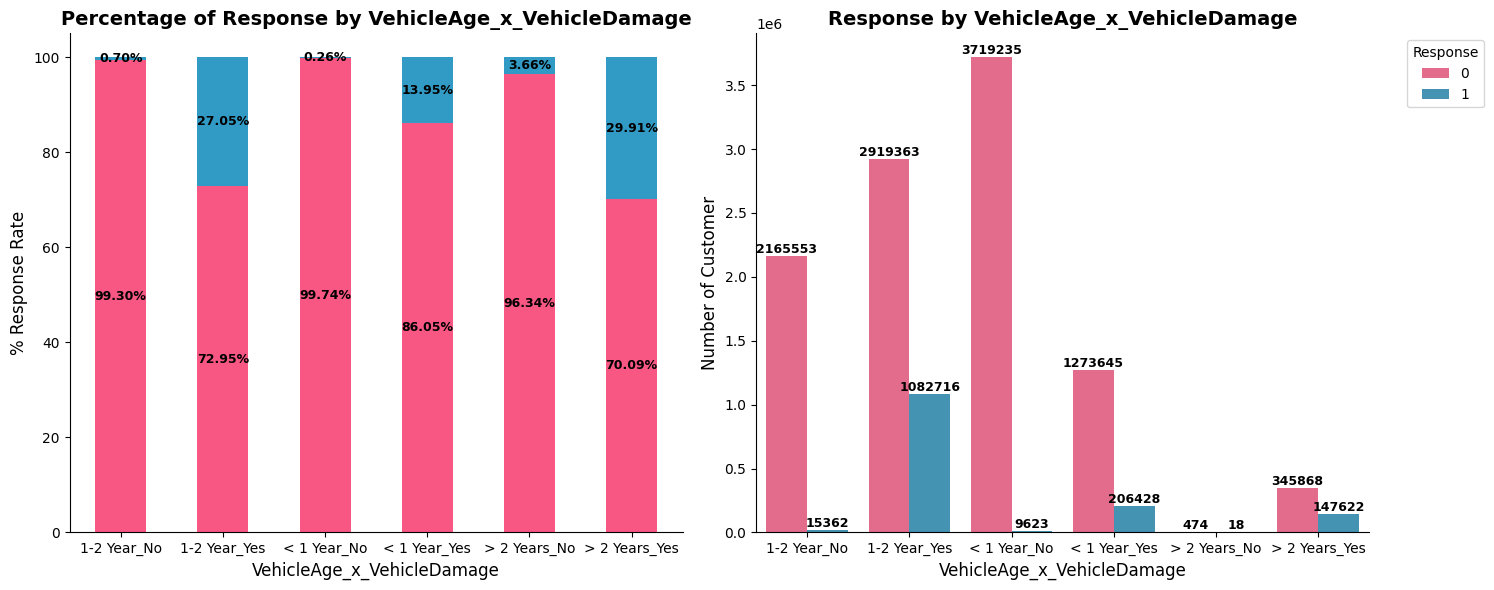


🔍 Chi-Square Test of Independence: 'VehicleAge_x_VehicleDamage' vs. 'Response'
Chi-squared statistic: 1726586.183
Degrees of freedom: 5
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'VehicleAge_x_VehicleDamage' and 'Response'.

Standardized Residuals:
Response                         0       1
VehicleAge_x_VehicleDamage                
1-2 Year_No                 182.83 -488.23
1-2 Year_Yes               -315.20  841.73
< 1 Year_No                 248.27 -662.98
< 1 Year_Yes                -21.42   57.20
> 2 Years_No                  2.05   -5.46
> 2 Years_Yes              -132.14  352.87


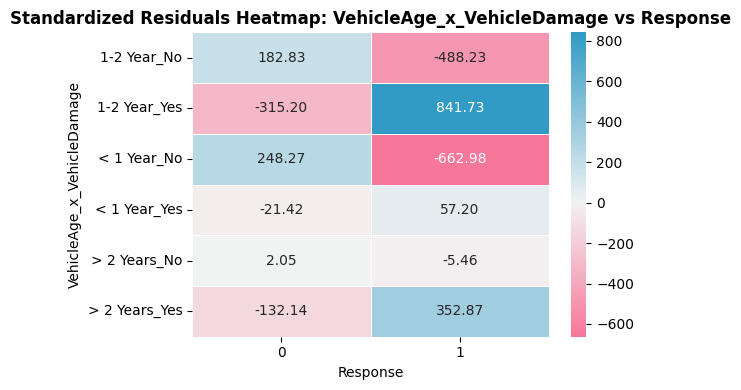

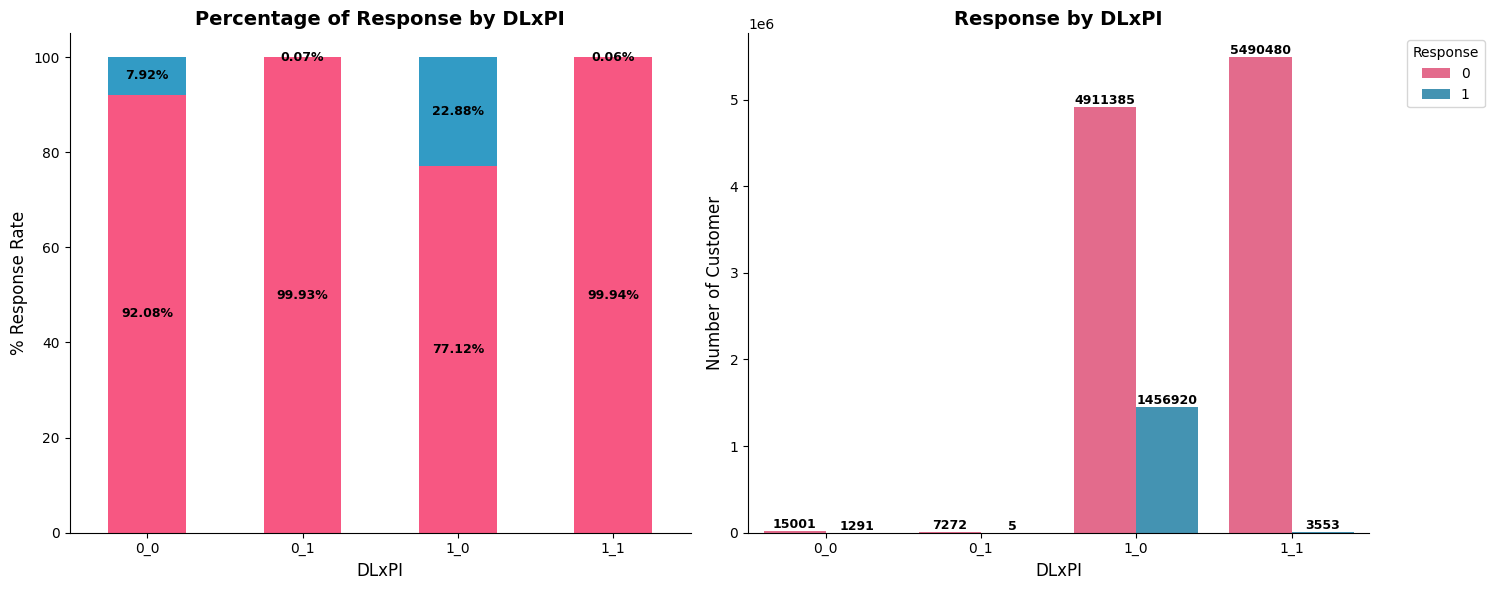


🔍 Chi-Square Test of Independence: 'DLxPI' vs. 'Response'
Chi-squared statistic: 1424465.881
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'DLxPI' and 'Response'.

Standardized Residuals:
Response       0       1
DLxPI                   
0_0         5.96  -15.92
0_1        11.14  -29.75
1_0      -285.08  761.28
1_1       306.20 -817.67


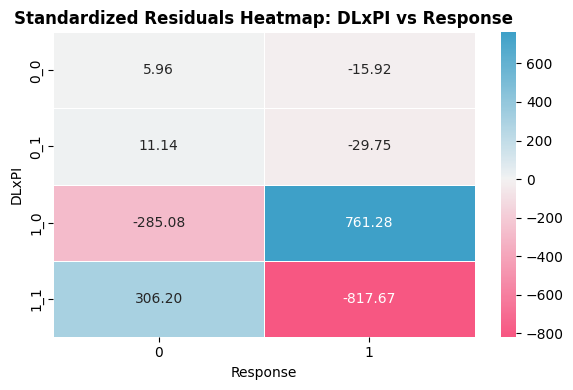

In [48]:
new_cat_features = ["VehicleAge_x_VehicleDamage", "DLxPI"]
for feature in new_cat_features:
    bivariate_percent_plot(cat=feature, df=df_train)

,Response,Count,Mean,Median,Std
1,1,1461769,336.032562,199.634918,505.654816
0,0,10424138,306.063965,183.979385,447.402954


🔎 D’Agostino and Pearson Normality Test for 'Premium_per_Vintage' across 'Response' groups

 Group: 0 (n = 10424138)
  Statistic : 11881726.173
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 1461769)
  Statistic : 1806430.859
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Premium_per_Vintage' by 'Response'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7274976940187.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Premium_per_Vintage' than Group '0'.


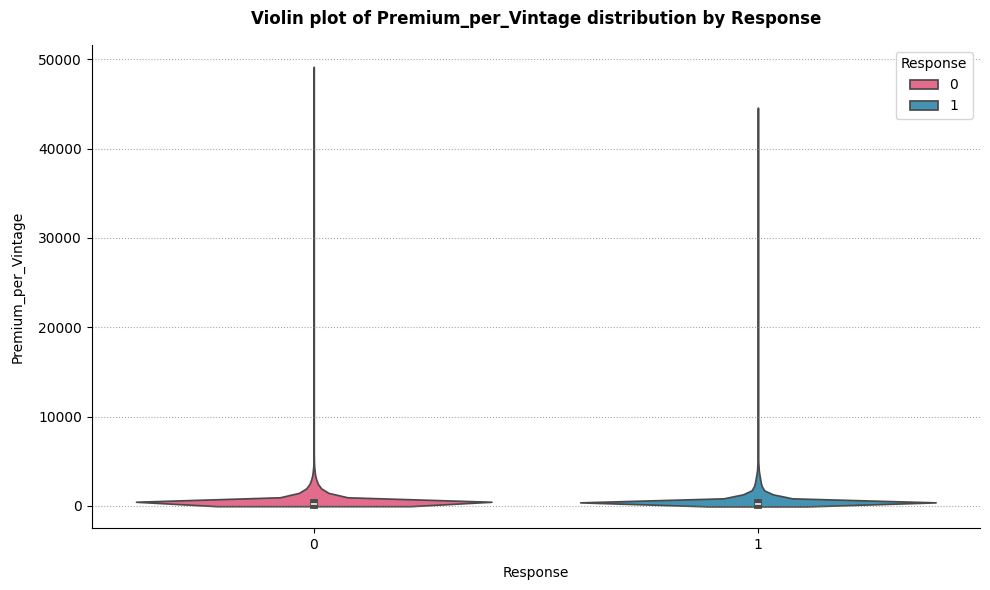

In [49]:
display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of Premium_per_Vintage by Response</b></h2>"))
plot_numerical_distribution_by_targer_feature(feature="Premium_per_Vintage", df_train=df_train)

**Insight**

`VehicleAge_x_VehicleDamage`

* **Previous vehicle damage** is a strong predictor of cross-sell interest, especially for 1–2-year-old cars.
* **New undamaged cars** (<2 years old, No damage) show almost no response.
* **Older undamaged cars** (>2 years, No damage): lower interest, but not the worst.

`DLxPI`

* **Group 1\_0** (Has a driving license, not previously insured) has the highest interest rate (\~22.88%) → **primary target group** for marketing.
* The other groups (**1\_1**, **0\_1**, **0\_0**) have extremely low response rates → **low priority** or can be excluded from campaigns.

`Premium_per_Vintage`

* Customers with higher premium per day of tenure are **more likely to respond positively** to cross-sell offers.

**Summary table**

| Feature / Interaction            | Key Insight                                                                                                                                                    | Statistical Significance |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------ |
| **Gender**                       | Male customers are more interested in cross-sell products, while female customers are less interested.                                                         | p-value < 0.05           |
| **Driving\_License**             | Customers with a driving license show more interest than those without.                                                                                        | p-value < 0.05           |
| **Previously\_Insured**          | Not previously insured → much more likely to respond positively; Already insured → much less likely.                                                           | p-value < 0.05           |
| **Vehicle\_Age**                 | Vehicles < 1 year → less interest; Vehicles 1–2 years or > 2 years → more interest.                                                                            | p-value < 0.05           |
| **Vehicle\_Damage**              | Damaged vehicles → much more interest; No damage → much less interest.                                                                                         | p-value < 0.05           |
| **Age**                          | Older customers are more interested; younger customers less so.                                                                                                | p-value < 0.05           |
| **Annual\_Premium**              | Higher premiums → more interest, possibly due to greater purchasing power.                                                                                     | p-value < 0.05           |
| **Vintage**                      | Longer-tenure customers less interested; newer customers more interested.                                                                                      | p-value < 0.05           |
| **Region\_Code**                 | Medians equal, but distribution differs slightly by region.                                                                                                    | p-value < 0.05           |
| **Policy\_Sales\_Channel**       | Lower median sales channel code linked to more interest; channel effectiveness may vary.                                                                       | p-value < 0.05           |
| **VehicleAge\_x\_VehicleDamage** | Previous vehicle damage is a strong predictor of cross-sell interest, especially for 1–2-year-old cars. New undamaged cars show almost no response.            | p-value < 0.05           |
| **DLxPI**                        | Group 1\_0 (Has driving license, not previously insured) has the highest interest (\~22.88%) → primary target group. Other groups have extremely low interest. | p-value < 0.05           |
| **Premium\_per\_Vintage**        | Customers with higher premium per day of tenure are more likely to respond positively to cross-sell offers.                                                    | p-value < 0.05           |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>

**Key Business Recommendations**:

1. **Target High-Potential Customer Segments**:
   Focus on **male customers**, those who are **not previously insured**, **have a driving license**, and **own damaged vehicles** — they show significantly higher interest in cross-sell products.

2. **Optimize Sales Channels**:
   Some sales channels (with lower codes) are more effective. **Concentrate efforts on high-performing channels** and consider reducing resources spent on less effective ones.

3. **Adjust Pricing & Incentive Strategies**:
   Customers with **higher premiums** and **higher premium per day of tenure** are more interested — consider **personalized offers or incentives** to boost conversion.

4. **Focus on New Customers**:
   **Newer customers** (lower vintage) are more responsive — prioritize **onboarding campaigns and welcome offers** to engage them early.

5. **Segment by Vehicle Characteristics**:
   Vehicles aged **1–2 years** and **previously damaged** correlate with higher interest — develop **targeted campaigns based on vehicle profiles**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
